In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
!pip install py7zr

In [118]:
!pip install brotlicffi

In [119]:
#Import downloaded modules
import py7zr
import brotlicffi as brotli
import tarfile

In [120]:
with py7zr.SevenZipFile(f"/content/drive/My Drive/Gitlab/Africa_1km_Population.7z",mode="r") as z:
  z.extractall("/content/Africa_1km_Population")

In [121]:

import os

extracted_folder = "/content/Africa_1km_Population"
extracted_data = os.listdir(extracted_folder)
num_items = len(extracted_data)

print("Number of items in the extracted folder:", num_items)

Number of items in the extracted folder: 23


In [122]:
print("Contents of the extracted folder:")
for item in extracted_data:
    print(item)

Contents of the extracted folder:
AFR_PPP_2005_adj_v2.tif
AFR_PPP_2000_adj_v2.tif.xml
AFR_PPP_2020_adj_v2.tif.aux.xml
AFR_PPP_2000_adj_v2.tif
README.txt
AFR_PPP_2020_adj_v2.tif.xml
AFR_PPP_2000_adj_v2.tfw
AFR_PPP_2010_adj_v2.tif
AFR_PPP_2005_adj_v2.tfw
AFR_PPP_2020_adj_v2.tif
AFR_PPP_2020_adj_v2.tfw
READ_ME.txt
AFR_PPP_2010_adj_v2.tif.aux.xml
WP_Africa_Continental_Population_Dataset_data_provenance.csv
AFR_PPP_2005_adj_v2.tif.xml
AFR_PPP_2010_adj_v2.tif.xml
AFR_PPP_2000_adj_v2.tif.aux.xml
AFR_PPP_2015_adj_v2.tfw
AFR_PPP_2015_adj_v2.tif
AFR_PPP_2010_adj_v2.tfw
AFR_PPP_2015_adj_v2.tif.xml
AFR_PPP_2005_adj_v2.tif.aux.xml
AFR_PPP_2015_adj_v2.tif.aux.xml


In [123]:
import shutil

source_folder = "/content/Africa_1km_Population"  # Replace with your actual source folder
destination_folder = "/content/my_destination_folder"  # Specify your desired destination folder

formats_to_extract = [".tfw", ".tif", ".tif.xml", ".tif.aux.xml"]

# Creating the destination folder
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for item in os.listdir(source_folder):
    item_extension = os.path.splitext(item)[-1].lower()
    if item_extension in formats_to_extract:
        source_path = os.path.join(source_folder, item)
        destination_path = os.path.join(destination_folder, item)
        if not os.path.exists(destination_path):
            shutil.copy(source_path, destination_path)

In [124]:

destination_folder = "/content/my_destination_folder"  # Specify the destination folder

# List the contents of the destination folder
destination_contents = os.listdir(destination_folder)

print("Contents of the destination folder:")
for item in destination_contents:
    print(item)

Contents of the destination folder:
AFR_PPP_2005_adj_v2.tif
AFR_PPP_2000_adj_v2.tif
AFR_PPP_2000_adj_v2.tfw
AFR_PPP_2010_adj_v2.tif
AFR_PPP_2005_adj_v2.tfw
AFR_PPP_2020_adj_v2.tif
AFR_PPP_2020_adj_v2.tfw
AFR_PPP_2015_adj_v2.tfw
AFR_PPP_2015_adj_v2.tif
AFR_PPP_2010_adj_v2.tfw


In [125]:
!pip install rasterio

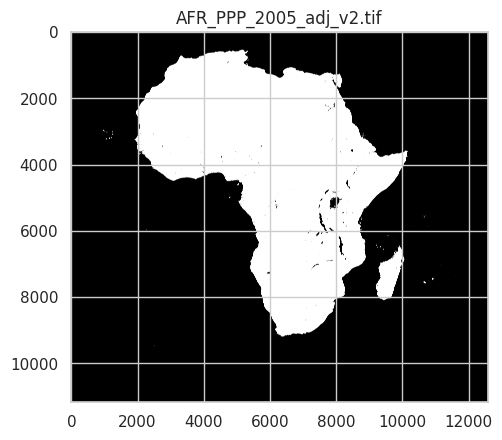

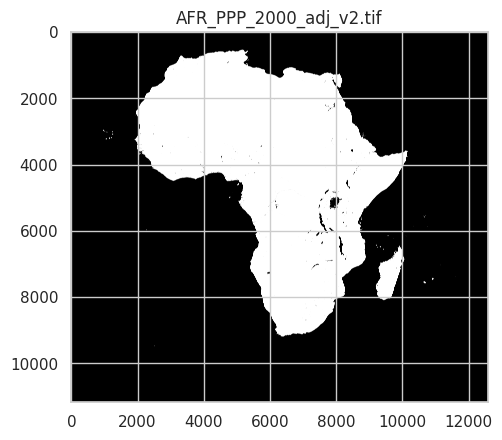

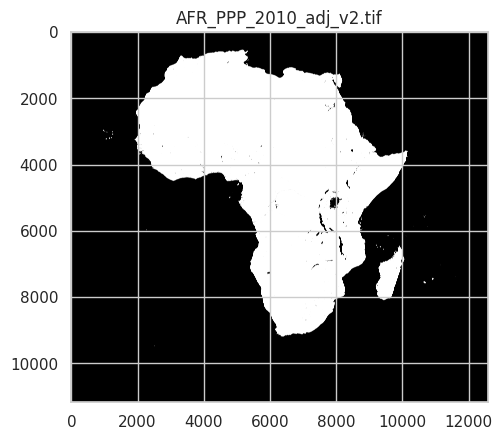

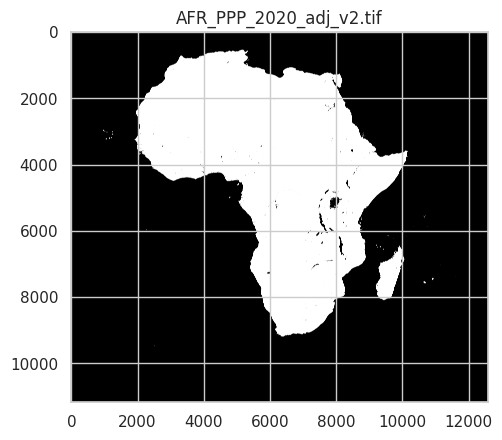

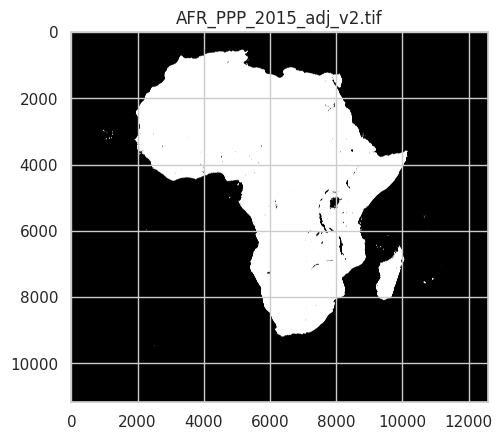

In [126]:
import matplotlib.pyplot as plt
import rasterio

# Path to the destination folder
destination_folder = "/content/my_destination_folder"

# List the contents of the destination folder
destination_contents = os.listdir(destination_folder)

# Filter TIF files
tif_files = [item for item in destination_contents if item.lower().endswith(".tif")]

# Display TIF images
for tif_file in tif_files:
    tif_path = os.path.join(destination_folder, tif_file)
    with rasterio.open(tif_path) as dataset:
        plt.imshow(dataset.read(1), cmap='gray')  # Display the first band
        plt.title(tif_file)
        plt.show()

In [127]:
#loading other packages
import numpy as np
import pandas as pd
import seaborn as sns

In [128]:
#import the plotly packages
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px

In [129]:
#Loading the cleaned dataset
df = pd.read_csv('/content/drive/My Drive/Gitlab/cleaned_data (3).csv')

In [130]:
df.head()

Country Name        Year  \
0       Algeria  2007-01-01   
1        Angola  2007-01-01   
2         Benin  2007-01-01   
3      Botswana  2007-01-01   
4  Burkina Faso  2007-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Malaria death  \
0                    26.0              0   
1               1533485.0          18237   
2                     0.0          12034   
3                   390.0              3   
4                 44246.0          31272   

   Use of insecticide-treated bed net in total population  \
0                                             4.7625        
1                                            18.0000        
2                                             2.8125        
3                                            21.6500        
4                                            24.9200        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             4.9125                                         
1                                            29.8000                                         
2                                            18.6750                                         
3                                            73.8625                                         
4                                            67.0625                                         

   Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)  \
0                                          19.163636                                       
1                                           1.500000                                       
2                                          15.000000                                       
3                                           8.600000                                       
4                                           7.000000                                       

   Total Population  Rural Population  ...  \
0        33983827.0        11776076.0  ...   
1        20909684.0         8881597.0  ...   
2         8647761.0         5053924.0  ...   
3         1966977.0          827547.0  ...   
4        14757074.0        11363537.0  ...   

   People using at least basic drinking water services, urban (% of urban population)  \
0                                              94.78                                    
1                                              65.83                                    
2                                              76.24                                    
3                                              94.35                                    
4                                              76.15                                    

   People using at least basic sanitation services (% of population)  \
0                                              85.85                   
1                                              37.26                   
2                                              11.80                   
3                                              61.60                   
4                                              15.60                   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94                                
1                                              14.00                                
2                                               4.29                                
3                                              39.99                                
4                                              

In [131]:
df.columns

Index(['Country Name', 'Year',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)

In [132]:
df.isnull().sum()

Country Name                                                                               0
Year                                                                                       0
Incidence of malaria (per 1,000 population at risk)                                        0
Malaria cases reported                                                                     0
Malaria death                                                                              0
Use of insecticide-treated bed net in total population                                     0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      0
Total Population                                                                           0
Rural Population                                                                           0
Urban Population                                                      

# **Research objectives**
* To assess the intricate interplay of population dynamics and malaria incidence rates, to discern the potential of incorporating population data as a predictive feature to amplify model generalization and predictive accuracy.
* To study the interaction amongst malaria preventive measures and identify complimentary and region-specific measures
* To determine the impact of additional preventive measure (vaccination) on malaria incidence rates.
* To create an improved malaria prediction model by engineering new features using our findings, introducing incidence rate thresholds and considering other modeling options based on research findings.

##### We will take this one after the other

1. To assess the intricate interplay of population dynamics and malaria incidence rates, to discern the potential of incorporating population data as a predictive feature to amplify model generalization and predictive accuracy.

As part of our methodology, we will be performing some statistical analysis, spatial analysis on malaria incidence. We will identify hotspot areas and coldspot areas. We will consider population derived formulas to engineer new features such as **Mortality rate** and **total malaria cases** in the total populations as well as in subpopulations such as Urban and Rural Population etc

In [133]:
working_df = df.copy()

In [134]:
working_df.columns

Index(['Country Name', 'Year',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)

In [135]:

from osgeo import ogr

shapefile_path = "/content/drive/My Drive/Gitlab/Africa.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile_path, 0)  # 0 means read-only

if dataSource is None:
    print("Could not open the file")
else:
    layer = dataSource.GetLayer()
    # Now you can work with the layer and its features
    dataSource = None  # Close the shapefile when done

Loading shape file

<Axes: >

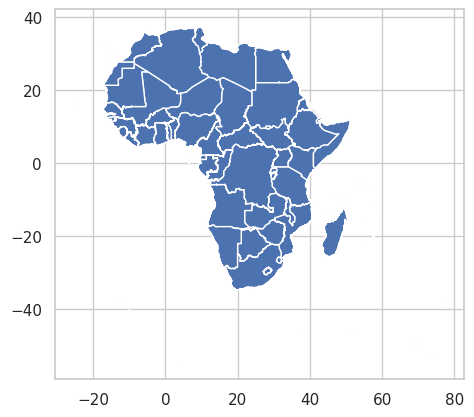

In [136]:

import geopandas as gpd
import pandas as pd

# Load the shapefile
shapefile_path = '/content/drive/My Drive/Gitlab/Africa.shp'
gdf = gpd.read_file(shapefile_path)

gdf.plot()

In [137]:
gdf.head()

NAME  CC  REGION iso_alpha2 iso_alpha3  iso_num  tld  \
0  ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
1  ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
2  ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
3  ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
4  ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   

                                            geometry  
0  POLYGON ((-2.05592 35.07370, -2.05675 35.07370...  
1  POLYGON ((-1.93833 35.08708, -1.94000 35.08703...  
2  POLYGON ((-2.11675 35.08955, -2.11758 35.08950...  
3  POLYGON ((-2.13464 35.09661, -2.13506 35.09620...  
4  POLYGON ((-2.16922 35.10205, -2.17006 35.10205...

In [138]:
gdf = gdf.rename(columns = {'NAME' : 'Country Name'})

In [139]:
gdf.head()

Country Name  CC  REGION iso_alpha2 iso_alpha3  iso_num  tld  \
0      ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
1      ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
2      ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
3      ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   
4      ALGERIA  AG  AFRICA         DZ        DZA     12.0  .dz   

                                            geometry  
0  POLYGON ((-2.05592 35.07370, -2.05675 35.07370...  
1  POLYGON ((-1.93833 35.08708, -1.94000 35.08703...  
2  POLYGON ((-2.11675 35.08955, -2.11758 35.08950...  
3  POLYGON ((-2.13464 35.09661, -2.13506 35.09620...  
4  POLYGON ((-2.16922 35.10205, -2.17006 35.10205...

In [140]:
gdf1 = gdf.drop(columns = ['CC', 'REGION','iso_alpha3', 'iso_alpha2','iso_num', 'tld'])

In [141]:
gdf1.head()

Country Name                                           geometry
0      ALGERIA  POLYGON ((-2.05592 35.07370, -2.05675 35.07370...
1      ALGERIA  POLYGON ((-1.93833 35.08708, -1.94000 35.08703...
2      ALGERIA  POLYGON ((-2.11675 35.08955, -2.11758 35.08950...
3      ALGERIA  POLYGON ((-2.13464 35.09661, -2.13506 35.09620...
4      ALGERIA  POLYGON ((-2.16922 35.10205, -2.17006 35.10205...

Converting our DataFrame to a GeoDataFrame

In [142]:
# Convert working_df to a GeoDataFrame if it contains spatial information

working_gdf = gpd.GeoDataFrame(working_df, geometry=gpd.points_from_xy(working_df.longitude, working_df.latitude))

# Perform a spatial join
merged_df = gpd.sjoin(gdf1, working_gdf, how='inner', op='contains')

# Drop duplicates, keeping only the first occurrence for each country
#merged_df = merged_df.drop_duplicates(subset='Country ID')

# Reset index
merged_df = merged_df.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

<ipython-input-142-cef06c282a9e>:6: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None




In [143]:
len(merged_df)

440

In [144]:
merged_df.head() #the point geometry has been converted to polygon geometry type

Country Name_left                                           geometry  \
0           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
1           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
2           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
3           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
4           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   

   index_right Country Name_right        Year  \
0          336            Algeria  2015-01-01   
1          420            Algeria  2017-01-01   
2           42            Algeria  2008-01-01   
3          378            Algeria  2016-01-01   
4           84            Algeria  2009-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Malaria cases reported  Malaria death  \
0                     0.0              0   
1                     0.0              0   
2                     3.0              0   
3                     0.0              0   
4                     0.0              0   

   Use of insecticide-treated bed net in total population  \
0                                               1.80        
1                                              13.90        
2                                              59.68        
3                                              31.85        
4                                              38.70        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             3.0000                                         
1                                            71.5000                                         
2                                             5.8375                                         
3                                             1.0000                                         
4                                            20.4625                                         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   People using at least basic drinking water services, rural (% of rural population)  \
0                                              88.69                                    
1                                              88.69                                    
2                                              86.19                                    
3                                              88.69                                    
4                                              86.54                                    

   People using at least basic drinking water services, urban (% of urban population)  \
0                                              95.44                                    
1                                              95.44                                    
2                                              94.86                                    
3                                              95.44                                    
4                                              94.94                                    

   People using at least basic sanitation services (% of population)  \
0                                              87.50                   
1                                              87.59                   
2                                              86.10                   
3                                              87.54                   
4                                              86.34                   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              82.21               

In [145]:

# Sort the merged GeoDataFrame by 'Year' and 'Country' columns
sorted_merged_gdf = merged_df.sort_values(by=['Year', 'Country Name_right'], ascending=[True, True])

# Reset index
sorted_merged_gdf = sorted_merged_gdf.reset_index(drop=True)

In [146]:
sorted_merged_gdf.head()

Country Name_left                                           geometry  \
0           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
1            ANGOLA  POLYGON ((11.75945 -17.25426, 11.75837 -17.254...   
2             BENIN  POLYGON ((2.84088 12.40599, 2.84306 12.40454, ...   
3          BOTSWANA  POLYGON ((25.16312 -17.77816, 25.16383 -17.778...   
4      BURKINA FASO  POLYGON ((-0.39571 15.01753, -0.38517 15.00288...   

   index_right Country Name_right        Year  \
0            0            Algeria  2007-01-01   
1            1             Angola  2007-01-01   
2            2              Benin  2007-01-01   
3            3           Botswana  2007-01-01   
4            4       Burkina Faso  2007-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Malaria death  \
0                    26.0              0   
1               1533485.0          18237   
2                     0.0          12034   
3                   390.0              3   
4                 44246.0          31272   

   Use of insecticide-treated bed net in total population  \
0                                             4.7625        
1                                            18.0000        
2                                             2.8125        
3                                            21.6500        
4                                            24.9200        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             4.9125                                         
1                                            29.8000                                         
2                                            18.6750                                         
3                                            73.8625                                         
4                                            67.0625                                         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   People using at least basic drinking water services, rural (% of rural population)  \
0                                              85.83                                    
1                                              23.77                                    
2                                              54.92                                    
3                                              57.60                                    
4                                              45.13                                    

   People using at least basic drinking water services, urban (% of urban population)  \
0                                              94.78                                    
1                                              65.83                                    
2                                              76.24                                    
3                                              94.35                                    
4                                              76.15                                    

   People using at least basic sanitation services (% of population)  \
0                                              85.85                   
1                                              37.26                   
2                                              11.80                   
3                                              61.60                   
4                                              15.60                   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94               

I have converted the point geomety type to a polygon geometry type to make spatial visualization possible

<Axes: >

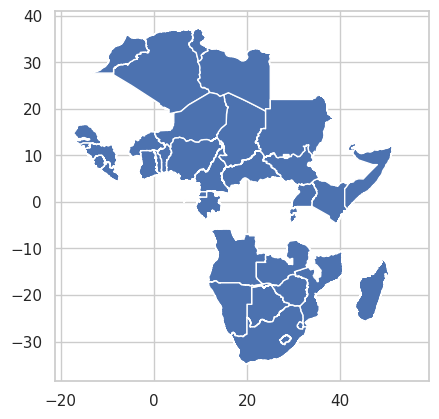

In [147]:
sorted_merged_gdf.plot()

In [148]:
#creating an interactive map to show us the incidence rates across the years
import folium
from branca.colormap import LinearColormap
# Create an interactive map using sorted_merged_gdf
m = folium.Map(location=[0, 0], zoom_start=2)

# Define a color scale for incidence rates
color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=0, vmax=100)

for year in sorted_merged_gdf['Year'].unique():
    # Create a feature group for each year
    year_group = folium.FeatureGroup(name=str(year))

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        popup_html = f"Country: {row['Country Name_right']}<br>Year: {row['Year']}<br>Incidence: {row['Incidence of malaria (per 1,000 population at risk)']}"
        color = color_scale(row['Incidence of malaria (per 1,000 population at risk)'])
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=folium.Popup(html=popup_html),
        ).add_to(year_group)

    # Add the feature group to the map
    year_group.add_to(m)

# Add the color scale to the map
color_scale.caption = 'Incidence Rate'
m.add_child(color_scale)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the interactive map to an HTML file
m.save('interactive_map.html')

# Display the map in the notebook
m


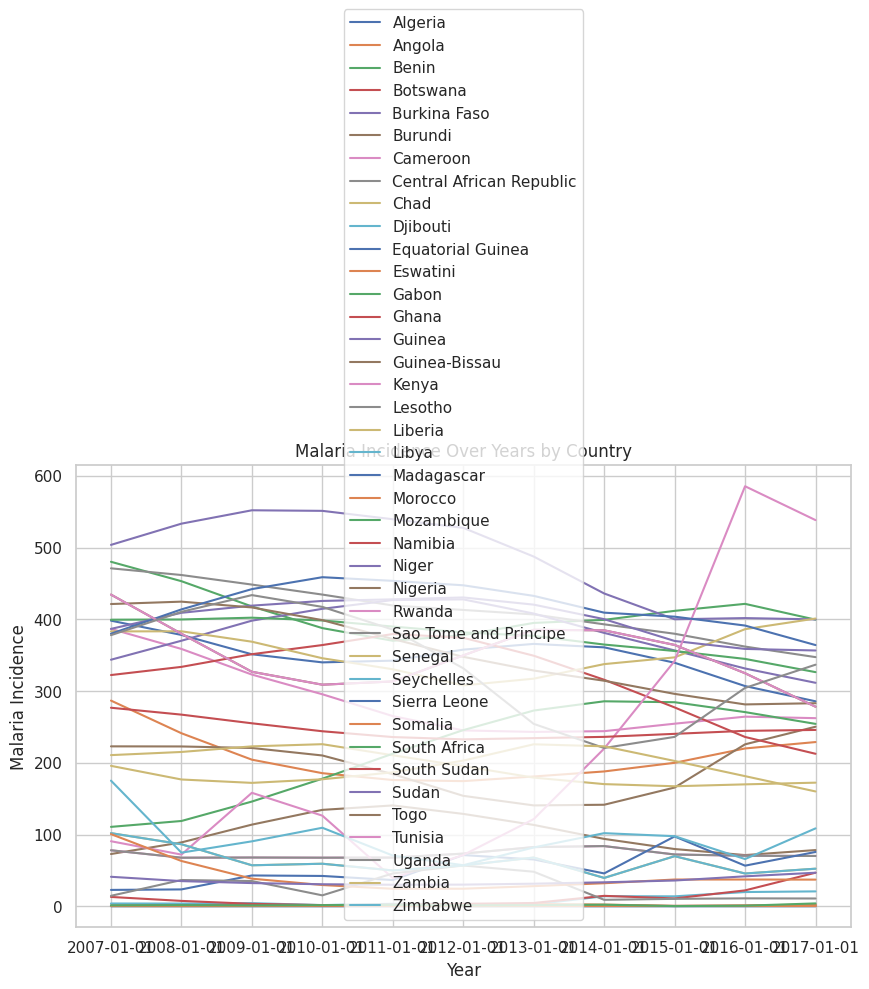

In [149]:
#Let us
# Plot malaria incidence over the years for each country
plt.figure(figsize=(10, 6))
for country, data in sorted_merged_gdf.groupby('Country Name_right'):
    plt.plot(data['Year'], data['Incidence of malaria (per 1,000 population at risk)'], label=country)

plt.xlabel('Year')
plt.ylabel('Malaria Incidence')
plt.title('Malaria Incidence Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-150-9b58bdc87469>:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1200x600 with 0 Axes>

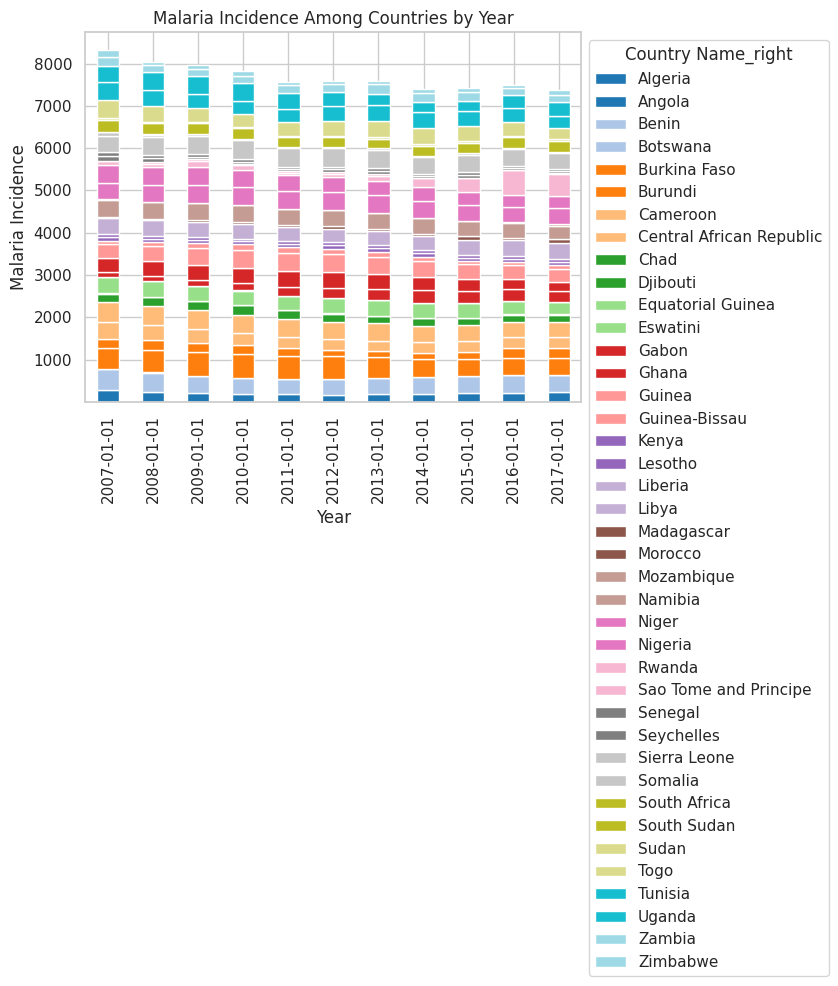

In [150]:


# Creating a grouped bar chart
plt.figure(figsize=(12, 6))

# Group by 'Year' and 'Country ID' and calculate the sum of malaria incidence
grouped_data = sorted_merged_gdf.groupby(['Year', 'Country Name_right'])['Incidence of malaria (per 1,000 population at risk)'].sum().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True, colormap='tab20')

plt.xlabel('Year')
plt.ylabel('Malaria Incidence')
plt.title('Malaria Incidence Among Countries by Year')
plt.legend(title='Country Name_right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<ipython-input-151-9b4888a9b8b2>:31: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



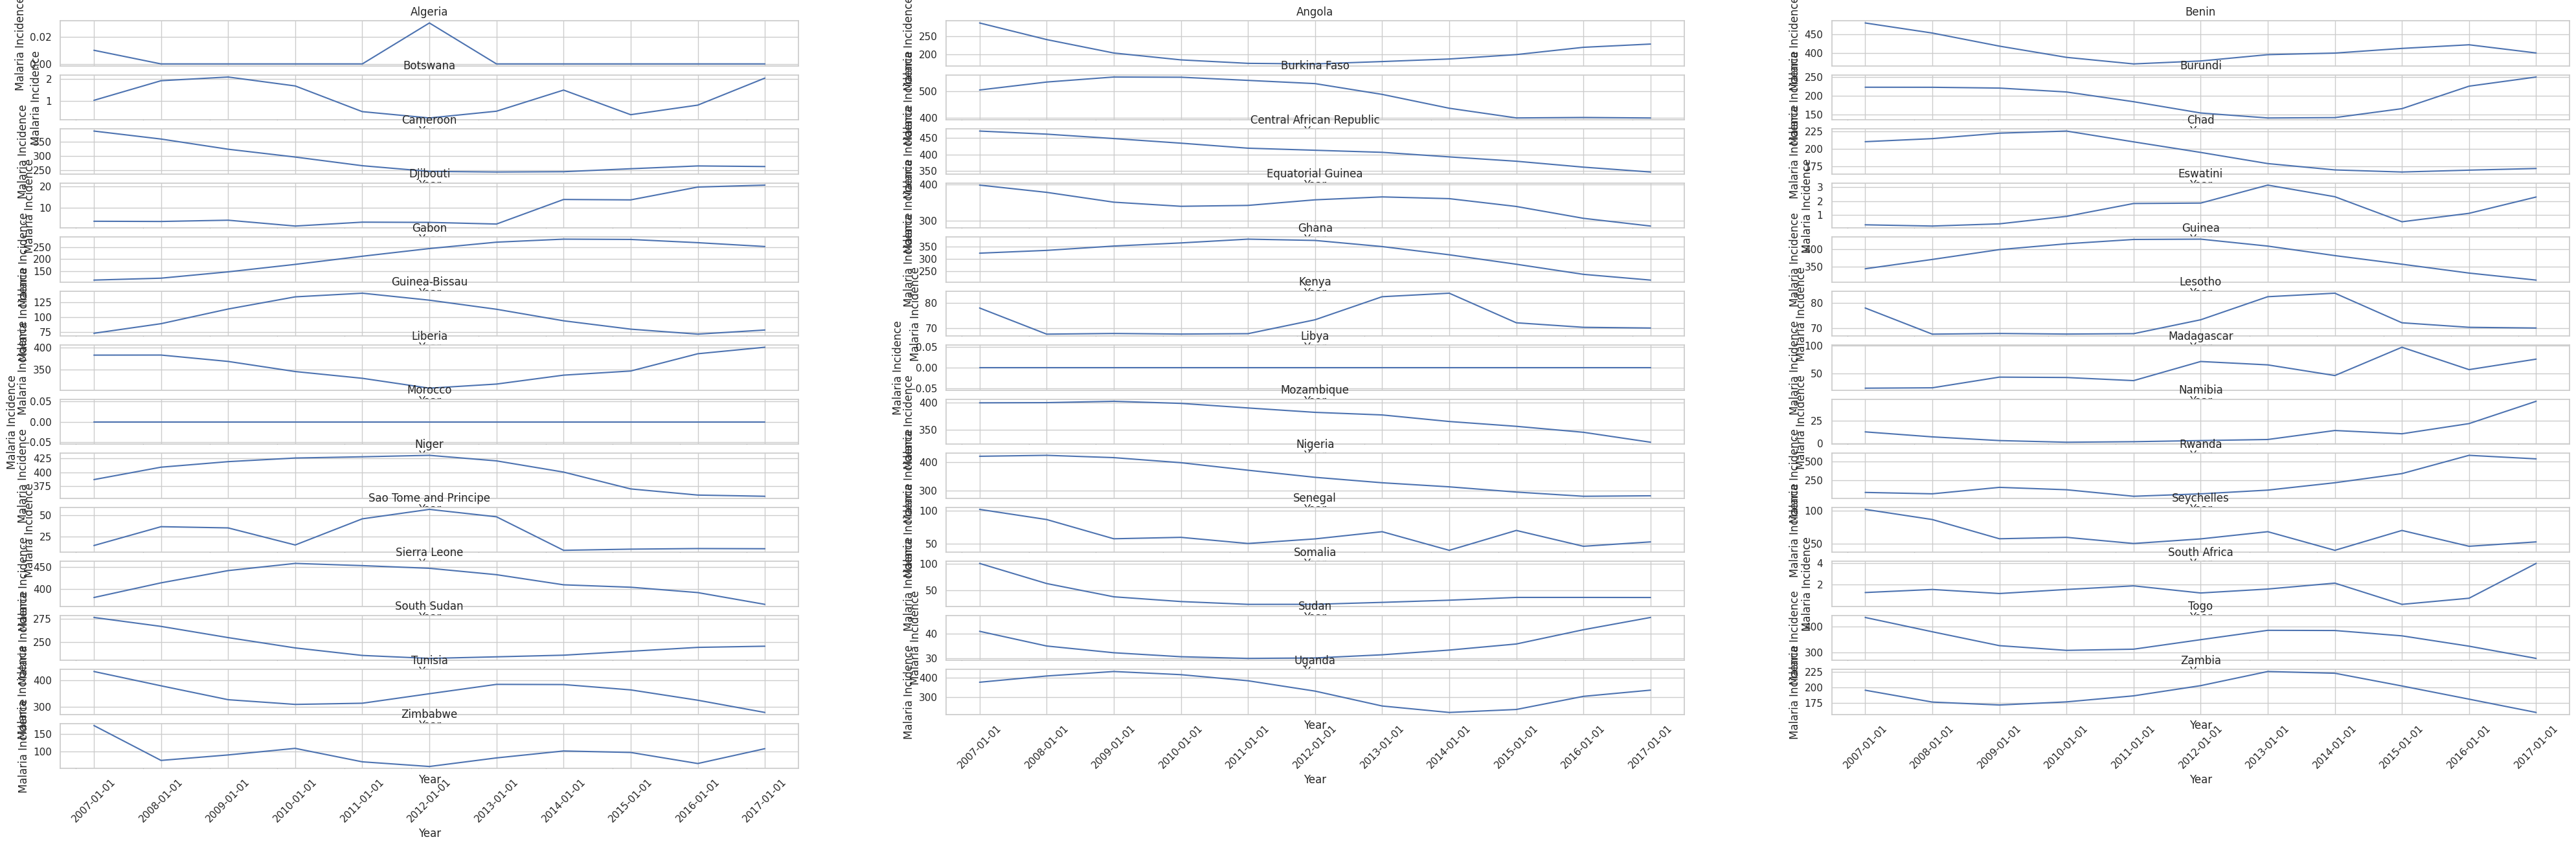

In [151]:
# Creating small multiples grid to make visualization more clearer (Temporal Trend)
import math

# Determine the number of rows and columns for the small multiples grid
num_countries = len(sorted_merged_gdf['Country Name_right'].unique())
num_cols = 3  # Set the number of columns
num_rows = math.ceil(num_countries / num_cols)

# Create a grid of subplots for small multiple line plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through unique countries and create line plots for each
for i, (country, data) in enumerate(sorted_merged_gdf.groupby('Country Name_right')):
    ax = axes[i]
    ax.plot(data['Year'], data['Incidence of malaria (per 1,000 population at risk)'])
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Malaria Incidence')
    ax.grid(True)
    ax.set_xticks(data['Year'])
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots
for i in range(num_countries, num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [152]:
import folium
from branca.colormap import LinearColormap
#Geographical location of countries based on their incidence rates

# Define the percentiles for classification (as decimals)
percentiles = [0.25, 0.75]

# Create an interactive map using sorted_merged_gdf
m = folium.Map(location=[0, 0], zoom_start=2)

# Define a color scale for incidence rates
color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=0, vmax=100)

for year in sorted_merged_gdf['Year'].unique():
    # Create a feature group for each year
    year_group = folium.FeatureGroup(name=str(year))

    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Incidence of malaria (per 1,000 population at risk)'].quantile(percentiles)

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        popup_html = f"Country: {row['Country Name_right']}<br>Year: {row['Year']}<br>Incidence: {row['Incidence of malaria (per 1,000 population at risk)']}"
        color = color_scale(row['Incidence of malaria (per 1,000 population at risk)'])

        # Classify countries based on percentiles
        if row['Incidence of malaria (per 1,000 population at risk)'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Incidence of malaria (per 1,000 population at risk)'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=folium.Popup(html=f"{popup_html}<br>Category: {category}"),
        ).add_to(year_group)

    # Add the feature group to the map
    year_group.add_to(m)

# Add the color scale to the map
color_scale.caption = 'Incidence Rate'
m.add_child(color_scale)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the interactive map to an HTML file
m.save('interactive_map_with_classification.html')

# Display the map in the notebook
m

In [153]:
#Classifying each countries based on their incidence rates into groups over the years (2007 - 2017)
classifications = {}

for year in sorted_merged_gdf['Year'].unique():
    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Incidence of malaria (per 1,000 population at risk)'].quantile(percentiles)

    year_classifications = {}
    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        # Classify countries based on percentiles
        if row['Incidence of malaria (per 1,000 population at risk)'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Incidence of malaria (per 1,000 population at risk)'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        year_classifications[row['Country Name_right']] = category

    classifications[year] = year_classifications

# Print the classifications
for year, year_classifications in classifications.items():
    print(f"Year: {year}")
    for country, category in year_classifications.items():
        print(f"Country: {country}, Category: {category}")
    print("-" * 20)

Year: 2007-01-01
Country: Algeria, Category: Low
Country: Angola, Category: Medium
Country: Benin, Category: High
Country: Botswana, Category: Low
Country: Burkina Faso, Category: High
Country: Burundi, Category: Medium
Country: Cameroon, Category: High
Country: Central African Republic, Category: High
Country: Chad, Category: Medium
Country: Djibouti, Category: Low
Country: Equatorial Guinea, Category: High
Country: Eswatini, Category: Low
Country: Gabon, Category: Medium
Country: Ghana, Category: Medium
Country: Guinea, Category: Medium
Country: Guinea-Bissau, Category: Medium
Country: Kenya, Category: Medium
Country: Lesotho, Category: Medium
Country: Liberia, Category: Medium
Country: Libya, Category: Low
Country: Madagascar, Category: Low
Country: Morocco, Category: Low
Country: Mozambique, Category: High
Country: Namibia, Category: Low
Country: Niger, Category: High
Country: Nigeria, Category: High
Country: Rwanda, Category: Medium
Country: Sao Tome and Principe, Category: Low
Co

In [154]:
sorted_merged_gdf.dtypes

Country Name_left                                                                            object
geometry                                                                                   geometry
index_right                                                                                   int64
Country Name_right                                                                           object
Year                                                                                         object
Incidence of malaria (per 1,000 population at risk)                                         float64
Malaria cases reported                                                                      float64
Malaria death                                                                                 int64
Use of insecticide-treated bed net in total population                                      float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)     float64


Visualizing countries with high, medium and low incidence rates across the years

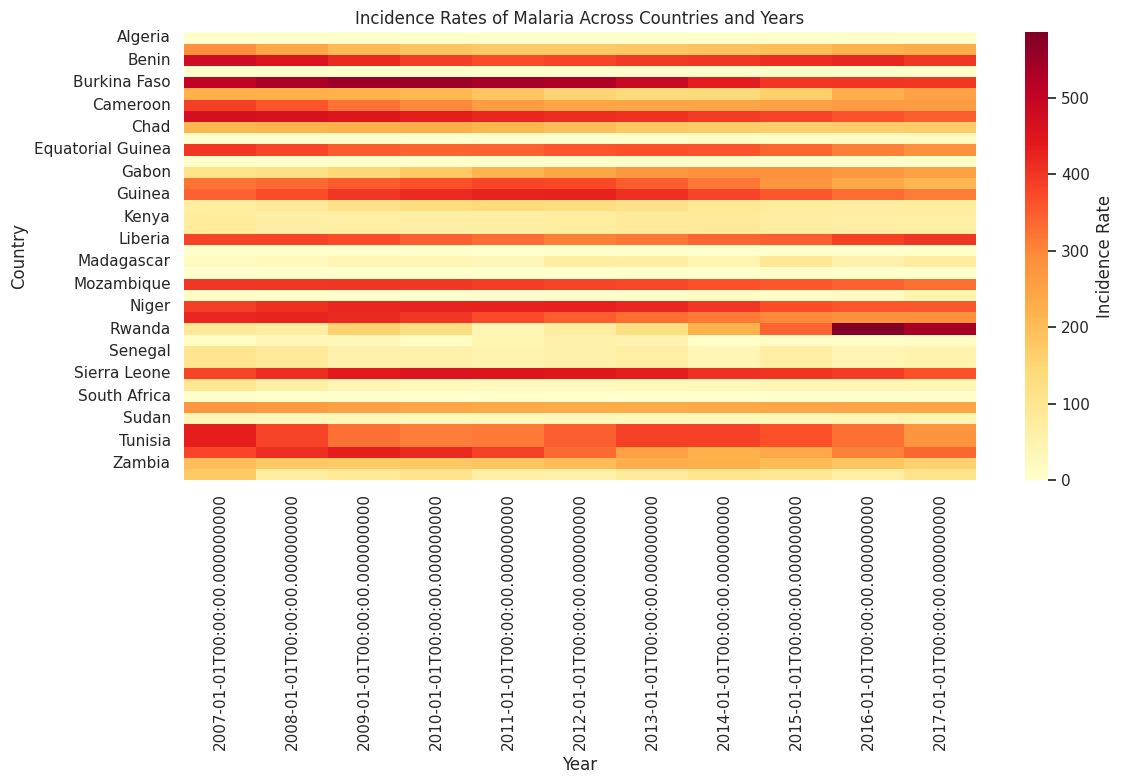

In [155]:
#Heatmap representation of countries with high, low and medium incidence rates
# Convert 'Year' column to datetime format
sorted_merged_gdf['Year'] = pd.to_datetime(sorted_merged_gdf['Year'])

# Pivot the data for heatmap
heatmap_data = sorted_merged_gdf.pivot(index='Country Name_right', columns='Year', values='Incidence of malaria (per 1,000 population at risk)')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Incidence Rate'})
plt.title('Incidence Rates of Malaria Across Countries and Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

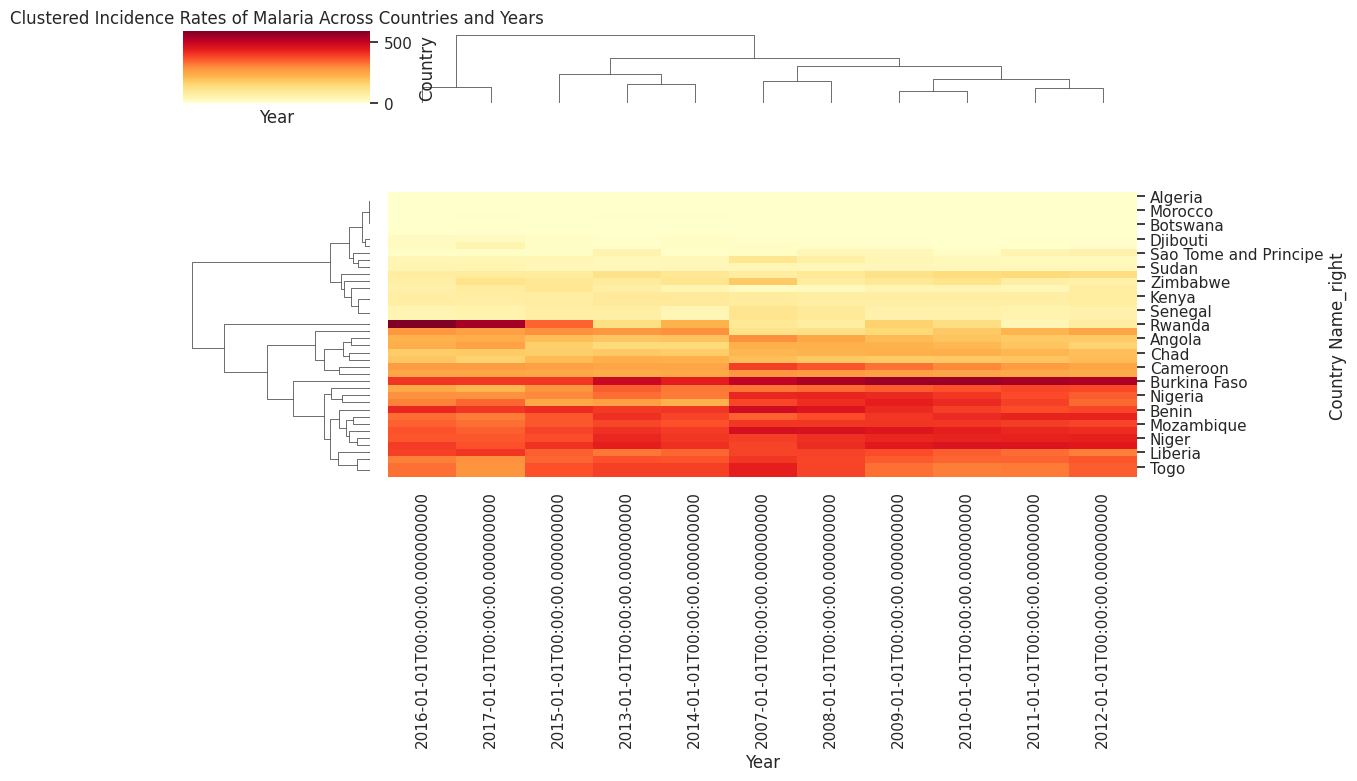

In [156]:
#Clustermap representation for better insights
# Convert 'Year' column to datetime format
sorted_merged_gdf['Year'] = pd.to_datetime(sorted_merged_gdf['Year'])

# Pivot the data for clustermap
clustermap_data = sorted_merged_gdf.pivot(index='Country Name_right', columns='Year', values='Incidence of malaria (per 1,000 population at risk)')

# Create a clustermap
plt.figure(figsize=(15, 8))
sns.clustermap(clustermap_data, cmap='YlOrRd', cbar_kws={'label': 'Incidence Rate'}, figsize=(12, 8))
plt.title('Clustered Incidence Rates of Malaria Across Countries and Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

This clustermap gives better insight into countries that are high risk and share similar malaria incidence rates. These countries include Benin, Burkina Faso, Nigeria, Mozambique, Niger, Liberia, and Central African Republic

# Reconfirmation of high risk zones, medium risk zones and  low risk zones using classification approach

In [157]:
# Classifying common countries in all years into classification groups based on the incidence rate
classifications = {}

for year in sorted_merged_gdf['Year'].unique():
    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Incidence of malaria (per 1,000 population at risk)'].quantile(percentiles)

    year_classifications = {}
    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        # Classify countries based on percentiles
        if row['Incidence of malaria (per 1,000 population at risk)'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Incidence of malaria (per 1,000 population at risk)'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        year_classifications[row['Country Name_right']] = category

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications[year_str] = year_classifications

# Create dictionaries to store countries in different categories across years
high_countries = {}
medium_countries = {}
low_countries = {}

for year, year_classifications in classifications.items():
    high_countries[year] = [country for country, category in year_classifications.items() if category == 'High']
    medium_countries[year] = [country for country, category in year_classifications.items() if category == 'Medium']
    low_countries[year] = [country for country, category in year_classifications.items() if category == 'Low']

# Print the sorted countries for each category and year
for year in sorted_merged_gdf['Year'].unique():
    print(f"Year: {year}")
    print("High Incidence Countries:", high_countries[str(year)])
    print("Medium Incidence Countries:", medium_countries[str(year)])
    print("Low Incidence Countries:", low_countries[str(year)])
    print("-" * 20)
# Create sets to store countries in different categories across years
high_countries_set = set()
medium_countries_set = set()
low_countries_set = set()

for year, year_classifications in classifications.items():
    high_countries_set.update(high_countries[year])
    medium_countries_set.update(medium_countries[year])
    low_countries_set.update(low_countries[year])

# Find the common countries in each subgroup
common_high_countries = high_countries_set.intersection(*high_countries.values())
common_medium_countries = medium_countries_set.intersection(*medium_countries.values())
common_low_countries = low_countries_set.intersection(*low_countries.values())

# Print the common countries in each subgroup
print("Common High Incidence Countries:", common_high_countries)
print("Common Medium Incidence Countries:", common_medium_countries)
print("Common Low Incidence Countries:", common_low_countries)

Year: 2007-01-01T00:00:00.000000000
High Incidence Countries: ['Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Equatorial Guinea', 'Mozambique', 'Niger', 'Nigeria', 'Togo', 'Tunisia']
Medium Incidence Countries: ['Angola', 'Burundi', 'Chad', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Uganda', 'Zambia', 'Zimbabwe']
Low Incidence Countries: ['Algeria', 'Botswana', 'Djibouti', 'Eswatini', 'Libya', 'Madagascar', 'Morocco', 'Namibia', 'Sao Tome and Principe', 'South Africa']
--------------------
Year: 2008-01-01T00:00:00.000000000
High Incidence Countries: ['Benin', 'Burkina Faso', 'Central African Republic', 'Liberia', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Uganda']
Medium Incidence Countries: ['Angola', 'Burundi', 'Cameroon', 'Chad', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Rwanda', 'Sao Tome and

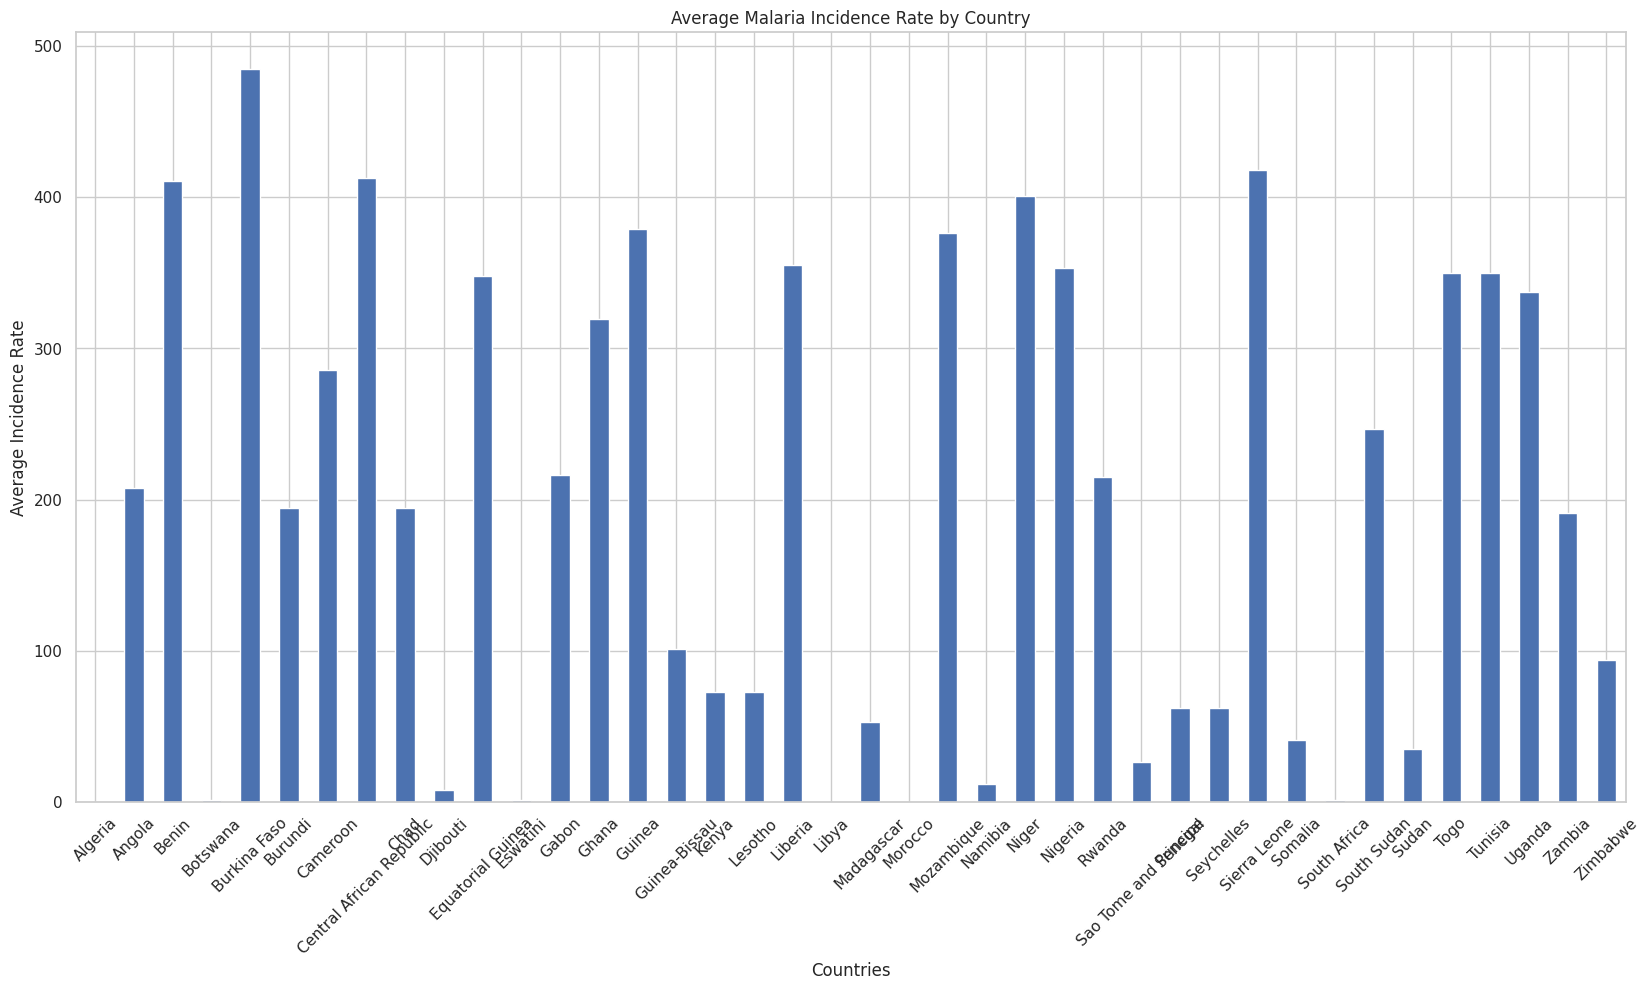

In [158]:
# Let us have a regional comparison based on the average malaria incidence rate by country
region_mortality = sorted_merged_gdf.groupby('Country Name_right')['Incidence of malaria (per 1,000 population at risk)'].mean()
region_mortality.plot(kind='bar', figsize=(20, 10))
plt.title('Average Malaria Incidence Rate by Country')
plt.xlabel('Countries')
plt.ylabel('Average Incidence Rate')
plt.xticks(rotation=45)
plt.show()

In [159]:
sorted_merged_gdf.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

Let us consider the effect of subpopulations (rural and urban population) on the Incidence rates

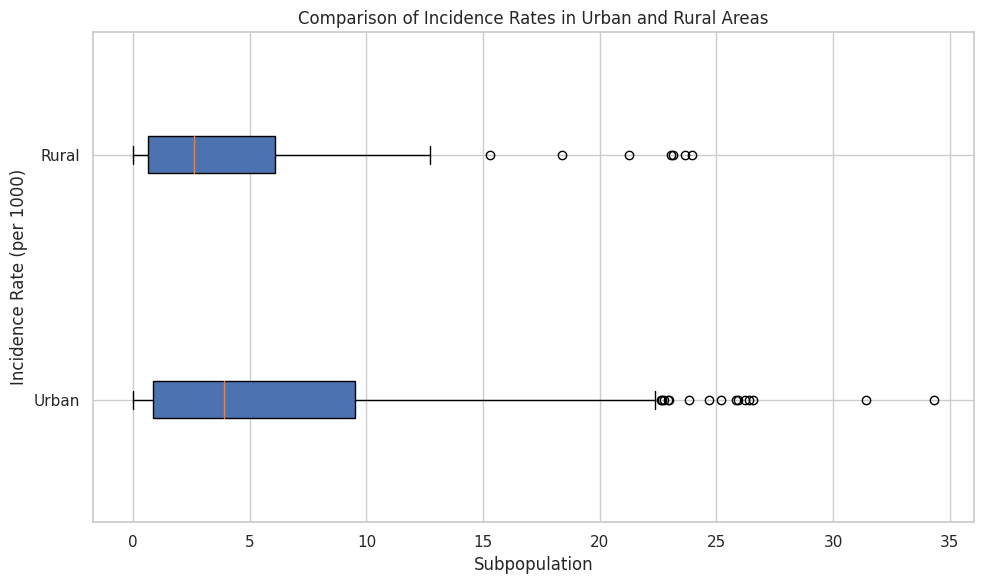

In [160]:
# Calculate incidence rates for rural and urban populations
sorted_merged_gdf['Incidence Rate Urban'] = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)'] / sorted_merged_gdf['Urban population (% of total population)']
sorted_merged_gdf['Incidence Rate Rural'] = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)'] / sorted_merged_gdf['Rural population (% of total population)']

# Create a box plot to compare incidence rates
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot([sorted_merged_gdf['Incidence Rate Urban'], sorted_merged_gdf['Incidence Rate Rural']],
                       vert=False, labels=['Urban', 'Rural'], patch_artist=True)

# Add a title and axis labels
plt.title('Comparison of Incidence Rates in Urban and Rural Areas')
plt.xlabel('Subpopulation')
plt.ylabel('Incidence Rate (per 1000)')

# Show the plot
plt.tight_layout()
plt.show()

It is observed that there are more malaria incidence in the urban area than in rural areas

# Now that we have a base idea of the effect of malaria incidence rate. Let us consider the effect of population and subpopulations on factors influencing malaria incidence rate such as mortality rate, case fatality, prevalence rates...

In this session we will be engineering new features to help in giving us a better understanding of countries that are high risk, low / medium

#Engineering new feature - Standardized Incidence Rate to accommodate for the new population dataset.


Standardized incidence rate is given by = number of new cases / Total Population at risk * 1000

In [161]:
#Let us standardized our incidence rate based on the new population datasets we added
incidence_rate = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)']
total_population = sorted_merged_gdf['Total Population']
no_of_cases = sorted_merged_gdf['Malaria cases reported']
expected_cases = sorted_merged_gdf['Total Malaria Cases']
sorted_merged_gdf['Standardized Incidence Rate'] = no_of_cases / total_population * 1000

In [162]:
sorted_merged_gdf.head()

Country Name_left                                           geometry  \
0           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
1            ANGOLA  POLYGON ((11.75945 -17.25426, 11.75837 -17.254...   
2             BENIN  POLYGON ((2.84088 12.40599, 2.84306 12.40454, ...   
3          BOTSWANA  POLYGON ((25.16312 -17.77816, 25.16383 -17.778...   
4      BURKINA FASO  POLYGON ((-0.39571 15.01753, -0.38517 15.00288...   

   index_right Country Name_right       Year  \
0            0            Algeria 2007-01-01   
1            1             Angola 2007-01-01   
2            2              Benin 2007-01-01   
3            3           Botswana 2007-01-01   
4            4       Burkina Faso 2007-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Malaria death  \
0                    26.0              0   
1               1533485.0          18237   
2                     0.0          12034   
3                   390.0              3   
4                 44246.0          31272   

   Use of insecticide-treated bed net in total population  \
0                                             4.7625        
1                                            18.0000        
2                                             2.8125        
3                                            21.6500        
4                                            24.9200        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             4.9125                                         
1                                            29.8000                                         
2                                            18.6750                                         
3                                            73.8625                                         
4                                            67.0625                                         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94                                
1                                              14.00                                
2                                               4.29                                
3                                              39.99                                
4                                               6.38                                

   People using at least basic sanitation services, urban  (% of urban population)  \
0                                              90.57                                 
1                                              54.44                                 
2                                              22.36                                 
3                                              77.30                                 
4                                              46.49                                 

    latitude  longitude  Total Malaria Cases  Mortality Rate  Prevalence Rate  \
0  28.033886   1.659626         3.398383e+02        0.000000     7.650698e-07   
1 -11.202692  17.873887         5.995225e+06        0.000872     7.333851e-02   
2   9.307690   2.315834         4.153001e+06        0.001392     0.000000e+00   
3 -22.328474  24.684866         2.025986e+03        0.000002     1.982738e-04   
4  12.238333  -1.561593         7.434614e+06        0.002119     2.998291e-03   

   Incidence Rate Urban  Incidence Rate Rural  Standardized Incidence Rate  
0              0.000153              0.000289                     0.0

In [163]:
sorted_merged_gdf.isnull().sum()


Country Name_left                                                                          0
geometry                                                                                   0
index_right                                                                                0
Country Name_right                                                                         0
Year                                                                                       0
Incidence of malaria (per 1,000 population at risk)                                        0
Malaria cases reported                                                                     0
Malaria death                                                                              0
Use of insecticide-treated bed net in total population                                     0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of 

In [164]:
sorted_merged_gdf.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

Let us identify countries with high, low and medium incidence rate (standardized incidence rates) across the years

In [165]:
# Classifying each countries based on their incidence rates into groups
classifications = {}

for year in sorted_merged_gdf['Year'].unique():
    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Standardized Incidence Rate'].quantile(percentiles)

    year_classifications = {}
    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        # Classify countries based on percentiles
        if row['Standardized Incidence Rate'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Standardized Incidence Rate'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        year_classifications[row['Country Name_right']] = category

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications[year_str] = year_classifications

# Create dictionaries to store countries in different categories across years
high_countries = {}
medium_countries = {}
low_countries = {}

for year, year_classifications in classifications.items():
    high_countries[year] = [country for country, category in year_classifications.items() if category == 'High']
    medium_countries[year] = [country for country, category in year_classifications.items() if category == 'Medium']
    low_countries[year] = [country for country, category in year_classifications.items() if category == 'Low']

# Print the sorted countries for each category and year
for year in sorted_merged_gdf['Year'].unique():
    print(f"Year: {year}")
    print("High Incidence Countries:", high_countries[str(year)])
    print("Medium Incidence Countries:", medium_countries[str(year)])
    print("Low Incidence Countries:", low_countries[str(year)])
    print("-" * 20)
# Create sets to store countries in different categories across years
high_countries_set = set()
medium_countries_set = set()
low_countries_set = set()

for year, year_classifications in classifications.items():
    high_countries_set.update(high_countries[year])
    medium_countries_set.update(medium_countries[year])
    low_countries_set.update(low_countries[year])

# Find the common countries in each subgroup
common_high_countries = high_countries_set.intersection(*high_countries.values())
common_medium_countries = medium_countries_set.intersection(*medium_countries.values())
common_low_countries = low_countries_set.intersection(*low_countries.values())

# Print the common countries in each subgroup
print("Common High Incidence Countries:", common_high_countries)
print("Common Medium Incidence Countries:", common_medium_countries)
print("Common Low Incidence Countries:", common_low_countries)

Year: 2007-01-01T00:00:00.000000000
High Incidence Countries: ['Angola', 'Burundi', 'Gabon', 'Liberia', 'Rwanda', 'Seychelles', 'Sudan', 'Togo', 'Tunisia', 'Uganda']
Medium Incidence Countries: ['Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Djibouti', 'Equatorial Guinea', 'Eswatini', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Libya', 'Madagascar', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Zambia', 'Zimbabwe']
Low Incidence Countries: []
--------------------
Year: 2008-01-01T00:00:00.000000000
High Incidence Countries: ['Angola', 'Burundi', 'Ghana', 'Lesotho', 'Liberia', 'Niger', 'Sao Tome and Principe', 'Seychelles', 'Togo', 'Tunisia']
Medium Incidence Countries: ['Burkina Faso', 'Chad', 'Djibouti', 'Equatorial Guinea', 'Gabon', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Madagascar', 'Mozambique', 'Namibia', 'Nigeria', '

We can see that from this classification, the result is still consistent with what we have in the previous classification when we havent standardized the incidence rate


In [166]:

#Geospatial analysis
import folium
import numpy as np
from branca.colormap import LinearColormap

# Define the percentiles for classification (as decimals)
percentiles = [0.25, 0.75]

# Create an interactive map using sorted_merged_gdf
m = folium.Map(location=[0, 0], zoom_start=2)

# Define a color scale for incidence rates
color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=0, vmax=100)

for year in sorted_merged_gdf['Year'].unique():
    # Create a feature group for each year
    year_group = folium.FeatureGroup(name=str(year))

    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Standardized Incidence Rate'].quantile(percentiles)

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        popup_html = f"Country: {row['Country Name_right']}<br>Year: {row['Year']}<br>Incidence: {row['Standardized Incidence Rate']}"
        color = color_scale(row['Standardized Incidence Rate'])

        # Classify countries based on percentiles
        if row['Standardized Incidence Rate'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Standardized Incidence Rate'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=folium.Popup(html=f"{popup_html}<br>Category: {category}"),
        ).add_to(year_group)

    # Add the feature group to the map
    year_group.add_to(m)

# Add the color scale to the map
color_scale.caption = 'Incidence Rate'
m.add_child(color_scale)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the interactive map to an HTML file
m.save('interactive_map_with_classification.html')

# Display the map in the notebook
m

<ipython-input-167-7f2a90691b99>:31: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



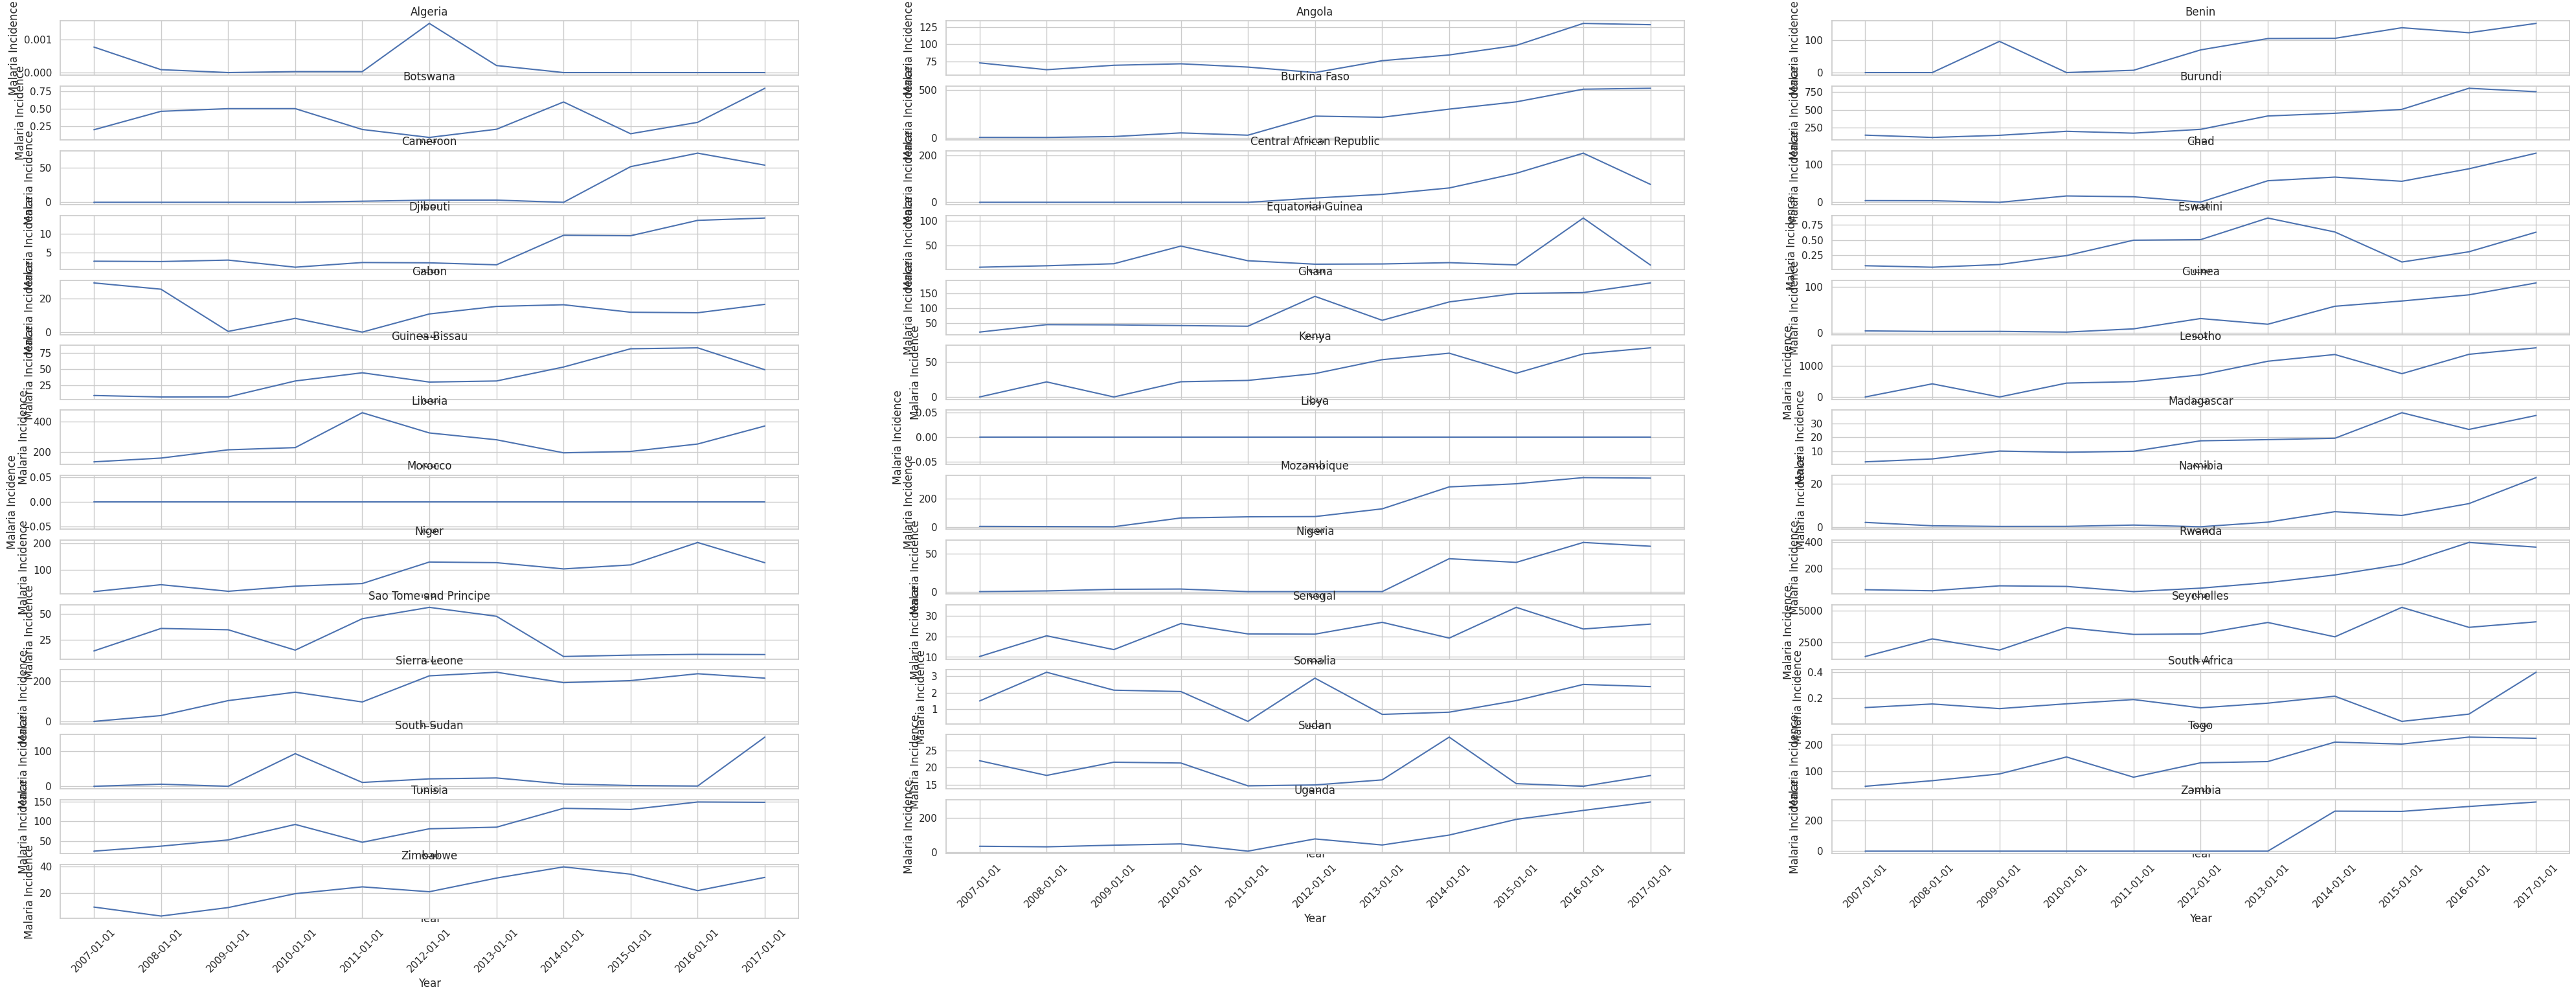

In [167]:
#Creating a multiple line grid to show the temporal trend of incidence rates across the countries over the years
import math

# Determine the number of rows and columns for the small multiples grid
num_countries = len(sorted_merged_gdf['Country Name_right'].unique())
num_cols = 3  # Set the number of columns
num_rows = math.ceil(num_countries / num_cols)

# Create a grid of subplots for small multiple line plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through unique countries and create line plots for each
for i, (country, data) in enumerate(sorted_merged_gdf.groupby('Country Name_right')):
    ax = axes[i]
    ax.plot(data['Year'], data['Standardized Incidence Rate'])
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Malaria Incidence')
    ax.grid(True)
    ax.set_xticks(data['Year'])
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots
for i in range(num_countries, num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

High risk zones(high incidence rate) =
* Burkina Faso 🇧🇫
* Burundi 🇧🇮
* Lesotho 🇱🇸
* Liberia 🇱🇷
* Mozambique 🇲🇿
* Rwanda 🇷🇼
* Seychelles 🇸🇨
* Togo 🇹🇬  
* Uganda 🇺🇬  
* Zambia 🇿🇲

Medium risk zones with medium malaria incidence rate
* Angola 🇦🇴
* Benin 🇧🇯  
* Cameroon 🇨🇲
* Central African Republic
* Chad 🇹🇩
* Gabon 🇬🇦
* Ghana 🇬🇭
* Guinea 🇬🇳
* Guinea-Bissau 🇬🇼
* Kenya 🇰🇪
* Madagascar 🇲🇬
* Namibia 🇳🇦
* Niger 🇳🇪
* Nigeria 🇳🇬
* Senegal 🇸🇳
* Sierra Leone 🇸🇱
* South Sudan 🇸🇩 🇸🇸
* Sudan 🇸🇸
* Tunisia 🇹🇳
* Zimbabwe 🇿🇼

Low risk countries (low incidence rate)
* Algeria 🇩🇿
* Botswana 🇧🇼
* Djibouti 🇩🇯
* Equatorial Guinea 🇬🇶
* Eswatini
* Libya 🇱🇾
* Morocco 🇲🇦
* Sao Tome and Principle 🇸🇹
* Somalia 🇸🇴
* South Africa 🇿🇦

# Engineering new features - Mortality rate
* The mortality rate, specifically the mortality rate due to a particular cause (such as malaria), is calculated as follows:
Mortality Rate (per 1000 population) = (Number of Deaths due to the Cause / Total Population) * 1000
Where:
Number of Deaths due to the Cause: This refers to the number of deaths attributed to the specific cause, in this case, malaria.Total Population: This is the total population of the area under consideration.
From our dataset, new data concerning malaria death have been added

In [168]:
sorted_merged_gdf.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

In [169]:
malaria_death = sorted_merged_gdf['Malaria death']
total_population = sorted_merged_gdf['Total Population']

sorted_merged_gdf['Mortality Rate'] = (malaria_death / total_population) * 1000

In [170]:
sorted_merged_gdf.head()

Country Name_left                                           geometry  \
0           ALGERIA  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...   
1            ANGOLA  POLYGON ((11.75945 -17.25426, 11.75837 -17.254...   
2             BENIN  POLYGON ((2.84088 12.40599, 2.84306 12.40454, ...   
3          BOTSWANA  POLYGON ((25.16312 -17.77816, 25.16383 -17.778...   
4      BURKINA FASO  POLYGON ((-0.39571 15.01753, -0.38517 15.00288...   

   index_right Country Name_right       Year  \
0            0            Algeria 2007-01-01   
1            1             Angola 2007-01-01   
2            2              Benin 2007-01-01   
3            3           Botswana 2007-01-01   
4            4       Burkina Faso 2007-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Malaria death  \
0                    26.0              0   
1               1533485.0          18237   
2                     0.0          12034   
3                   390.0              3   
4                 44246.0          31272   

   Use of insecticide-treated bed net in total population  \
0                                             4.7625        
1                                            18.0000        
2                                             2.8125        
3                                            21.6500        
4                                            24.9200        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             4.9125                                         
1                                            29.8000                                         
2                                            18.6750                                         
3                                            73.8625                                         
4                                            67.0625                                         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   People using at least basic sanitation services, rural (% of rural population)  \
0                                              76.94                                
1                                              14.00                                
2                                               4.29                                
3                                              39.99                                
4                                               6.38                                

   People using at least basic sanitation services, urban  (% of urban population)  \
0                                              90.57                                 
1                                              54.44                                 
2                                              22.36                                 
3                                              77.30                                 
4                                              46.49                                 

    latitude  longitude  Total Malaria Cases  Mortality Rate  Prevalence Rate  \
0  28.033886   1.659626         3.398383e+02        0.000000     7.650698e-07   
1 -11.202692  17.873887         5.995225e+06        0.872180     7.333851e-02   
2   9.307690   2.315834         4.153001e+06        1.391574     0.000000e+00   
3 -22.328474  24.684866         2.025986e+03        0.001525     1.982738e-04   
4  12.238333  -1.561593         7.434614e+06        2.119119     2.998291e-03   

   Incidence Rate Urban  Incidence Rate Rural  Standardized Incidence Rate  
0              0.000153              0.000289                     0.0

In [171]:
sorted_merged_gdf_tem = sorted_merged_gdf.set_index('Year', drop = True)

In [172]:
sorted_merged_gdf_tem.head()

Country Name_left  \
Year                           
2007-01-01           ALGERIA   
2007-01-01            ANGOLA   
2007-01-01             BENIN   
2007-01-01          BOTSWANA   
2007-01-01      BURKINA FASO   

                                                     geometry  index_right  \
Year                                                                         
2007-01-01  POLYGON ((-3.55328 31.06993, -3.55351 31.07054...            0   
2007-01-01  POLYGON ((11.75945 -17.25426, 11.75837 -17.254...            1   
2007-01-01  POLYGON ((2.84088 12.40599, 2.84306 12.40454, ...            2   
2007-01-01  POLYGON ((25.16312 -17.77816, 25.16383 -17.778...            3   
2007-01-01  POLYGON ((-0.39571 15.01753, -0.38517 15.00288...            4   

           Country Name_right  \
Year                            
2007-01-01            Algeria   
2007-01-01             Angola   
2007-01-01              Benin   
2007-01-01           Botswana   
2007-01-01       Burkina Faso   

            Incidence of malaria (per 1,000 population at risk)  \
Year                                                              
2007-01-01                                               0.01     
2007-01-01                                             286.72     
2007-01-01                                             480.24     
2007-01-01                                               1.03     
2007-01-01                                             503.80     

            Malaria cases reported  Malaria death  \
Year                                                
2007-01-01                    26.0              0   
2007-01-01               1533485.0          18237   
2007-01-01                     0.0          12034   
2007-01-01                   390.0              3   
2007-01-01                 44246.0          31272   

            Use of insecticide-treated bed net in total population  \
Year                                                                 
2007-01-01                                             4.7625        
2007-01-01                                            18.0000        
2007-01-01                                             2.8125        
2007-01-01                                            21.6500        
2007-01-01                                            24.9200        

            Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
Year                                                                                                  
2007-01-01                                             4.9125                                         
2007-01-01                                            29.8000                                         
2007-01-01                                            18.6750                                         
2007-01-01                                            73.8625                                         
2007-01-01                                            67.0625                                         

            Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)  \
Year                                                                                                
2007-01-01                                          19.163636                                       
2007-01-01                                           1.500000                                       
2007-01-01                                          15.000000                                       
2007-01-01                                           8.600000                                       
2007-01-01                                           7.000000                                       

            ...  \
Year        ...   
2007-01-01  ...   
2007-01-01  ...   
2007-01-01  ...   
2007-01-01  ...   
2007-01-01  ...   

            People using at least basic sanitation services, rural (% of rural population)  \
Year            

In [173]:
#classifying countries into different groups of mortality rate for better insight
classifications = {}

for year in sorted_merged_gdf['Year'].dt.year.unique():
    # Calculate percentiles for the current year
    percentiles_values = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate'].quantile(percentiles)

    year_classifications = {}
    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year].iterrows():
        # Classify countries based on percentiles
        if row['Mortality Rate'] < percentiles_values.iloc[0]:
            category = 'Low'
        elif row['Mortality Rate'] > percentiles_values.iloc[1]:
            category = 'High'
        else:
            category = 'Medium'

        year_classifications[row['Country Name_right']] = category

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications[year_str] = year_classifications

# Create dictionaries to store countries in different categories across years
high_countries = {}
medium_countries = {}
low_countries = {}

for year, year_classifications in classifications.items():
    high_countries[year] = [country for country, category in year_classifications.items() if category == 'High']
    medium_countries[year] = [country for country, category in year_classifications.items() if category == 'Medium']
    low_countries[year] = [country for country, category in year_classifications.items() if category == 'Low']

# Print the sorted countries for each category and year
for year in sorted_merged_gdf['Year'].dt.year.unique():
    print(f"Year: {year}")
    print("High Mortality Rate Countries:", high_countries[str(year)])
    print("Medium Mortality Rate Countries:", medium_countries[str(year)])
    print("Low Mortality Rate Countries:", low_countries[str(year)])
    print("-" * 20)


Year: 2007
High Mortality Rate Countries: ['Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Guinea', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Togo']
Medium Mortality Rate Countries: ['Angola', 'Burundi', 'Chad', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Namibia', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Somalia', 'South Sudan', 'Sudan', 'Uganda', 'Zambia', 'Zimbabwe']
Low Mortality Rate Countries: ['Algeria', 'Botswana', 'Djibouti', 'Eswatini', 'Lesotho', 'Libya', 'Morocco', 'Seychelles', 'South Africa', 'Tunisia']
--------------------
Year: 2008
High Mortality Rate Countries: ['Benin', 'Burkina Faso', 'Central African Republic', 'Chad', 'Guinea', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Uganda']
Medium Mortality Rate Countries: ['Angola', 'Burundi', 'Cameroon', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Namibia', 'Rwanda', 'Sao Tome and Principe',

Let us check which countries have both high mortality and high incidence rates

In [174]:
high_incidence_countries = ['Burkina Faso', 'Burundi', 'Lesotho', 'Liberia', 'Mozambique', 'Rwanda', 'Seychelles', 'Togo', 'Uganda', 'Zambia']
high_mortality_countries = ['Benin', 'Burkina Faso', 'Central African Republic', 'Chad', 'Guinea', 'Liberia', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone']
#standardized incidence rates .....high_incidence_countries = ['Burkina Faso', 'Burundi', 'Lesotho', 'Liberia', 'Mozambique', 'Rwanda', 'Seychelles', 'Togo', 'Uganda', 'Zambia']

# Find the countries that appear in both lists
high_mortality_and_incidence_countries = set(high_mortality_countries) & set(high_incidence_countries)

print("Countries with Both High Mortality and High Incidence Rates:", high_mortality_and_incidence_countries)

#For medium
medium_incidence_countries = ['Angola', 'Burundi', 'Cameroon', 'Chad', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Madagascar', 'Namibia', 'Nigeria', 'Senegal', 'Seychelles', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Zambia', 'Zimbabwe']
medium_mortality_rate_countries = ['Angola', 'Burundi', 'Cameroon', 'Djibouti', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Madagascar', 'Namibia', 'Rwanda', 'Senegal', 'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']
# Find the countries that appear in both lists
medium_mortality_and_incidence_countries = set(medium_mortality_rate_countries) & set(medium_incidence_countries)

print("Countries with Both Medium Mortality and High Incidence Rates:", medium_mortality_and_incidence_countries)

#For low

low_mortality_rate_countries = ['Algeria', 'Botswana', 'Eswatini', 'Lesotho', 'Libya', 'Morocco', 'Sao Tome and Principe', 'Seychelles', 'South Africa', 'Tunisia']
low_incidence_countries =  ['Algeria', 'Botswana', 'Djibouti', 'Eswatini', 'Libya', 'Morocco', 'Sao Tome and Principe', 'Somalia', 'South Africa']
# Find the countries that appear in both lists
low_mortality_and_incidence_countries = set(low_mortality_rate_countries) & set(low_incidence_countries)

print("Countries with Both Low Mortality and High Incidence Rates:", low_mortality_and_incidence_countries)



Countries with Both High Mortality and High Incidence Rates: {'Liberia', 'Mozambique', 'Burkina Faso'}
Countries with Both Medium Mortality and High Incidence Rates: {'Angola', 'Guinea-Bissau', 'Senegal', 'Burundi', 'Madagascar', 'Equatorial Guinea', 'Sudan', 'Togo', 'Ghana', 'South Sudan', 'Zambia', 'Namibia', 'Cameroon', 'Zimbabwe', 'Kenya', 'Gabon'}
Countries with Both Low Mortality and High Incidence Rates: {'Morocco', 'South Africa', 'Sao Tome and Principe', 'Botswana', 'Eswatini', 'Libya', 'Algeria'}


These countries should be given attention to during analysis of preventive measures

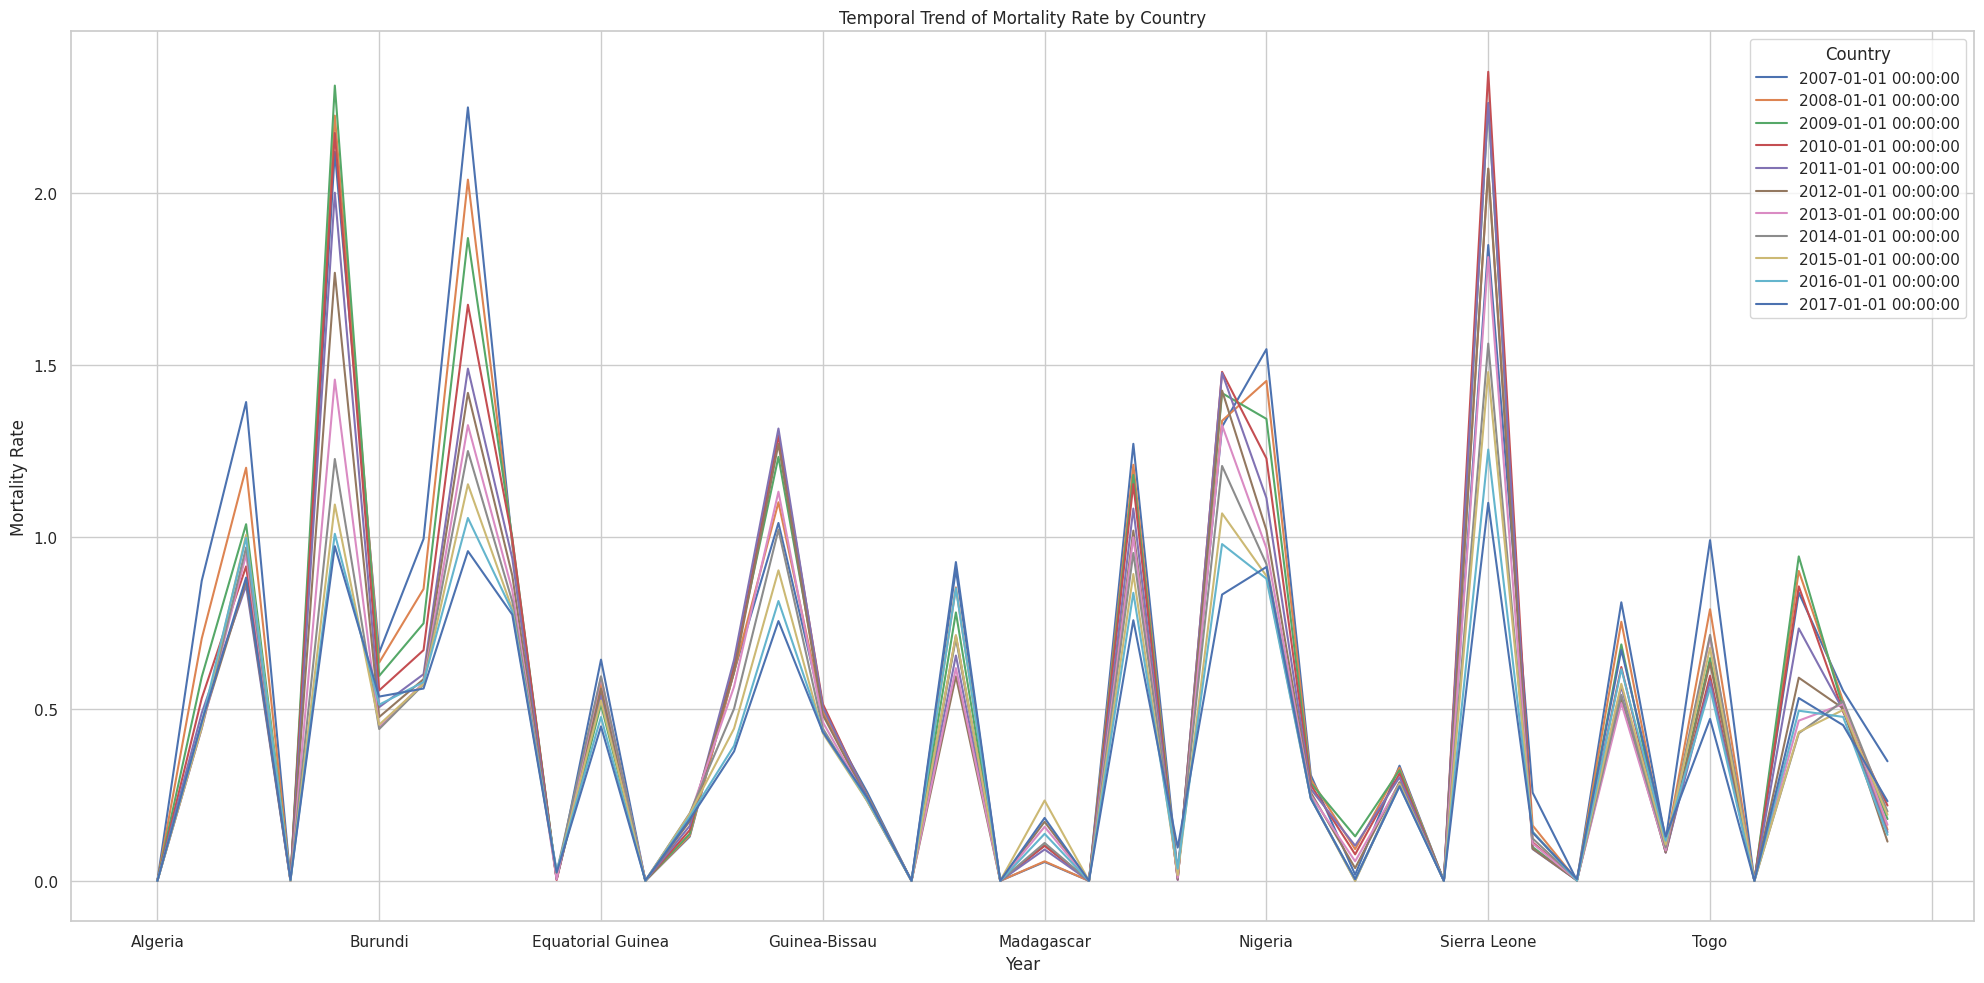

In [175]:
#Temporal trend of mortality rate by country
# Group data by 'Country' and 'Year', then calculate the mean mortality rate for each country-year pair
country_yearly_mortality = sorted_merged_gdf.groupby(['Country Name_right', 'Year'])['Mortality Rate'].mean()

# Unstack the data to have 'Country' as columns and 'Year' as index
country_yearly_mortality = country_yearly_mortality.unstack()

# Plotting
plt.figure(figsize=(20, 10))
country_yearly_mortality.plot(ax=plt.gca())
plt.title('Temporal Trend of Mortality Rate by Country')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

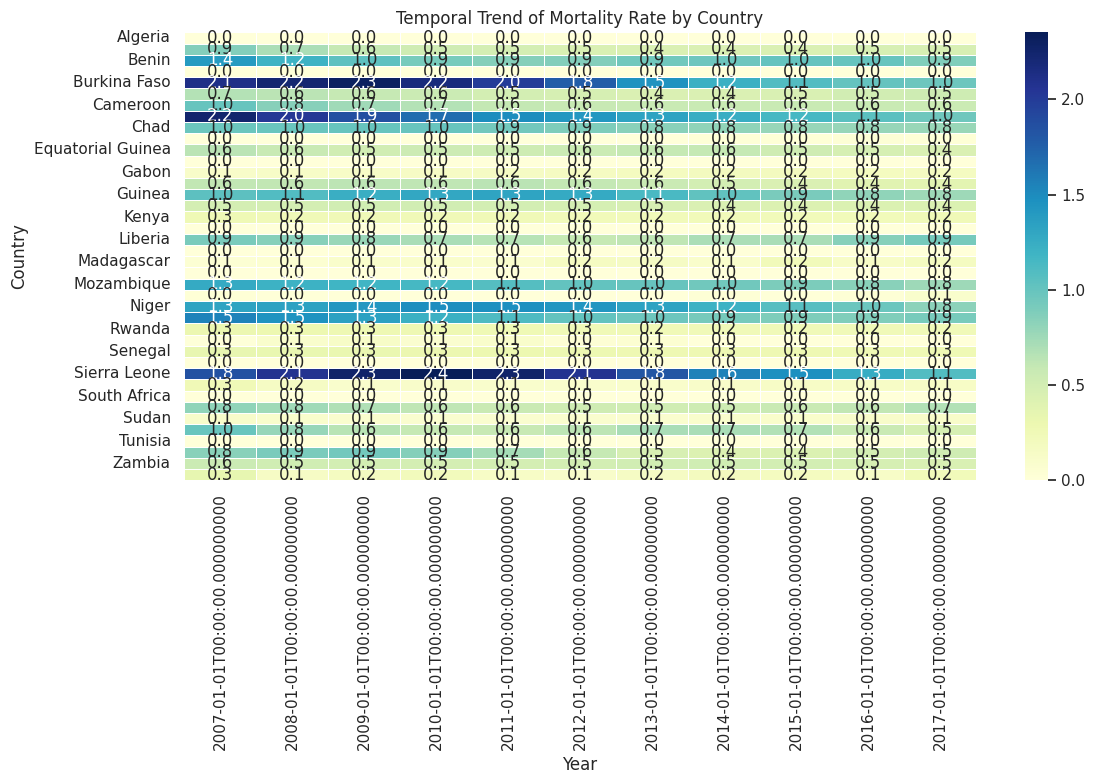

In [176]:
#For the sake of interpretability which is focal to our work, let us visualize using a heatmap
# Pivot the data to create a matrix with 'Country' as rows, 'Year' as columns, and 'Mortality Rate' as values
pivot_table = sorted_merged_gdf.pivot(index='Country Name_right', columns='Year', values='Mortality Rate')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".1f")
plt.title('Temporal Trend of Mortality Rate by Country')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

From here we can also see the trends of countries along the years based on their mortality rate. We have an understanding of what the level of mortality will be for each country as indicated above

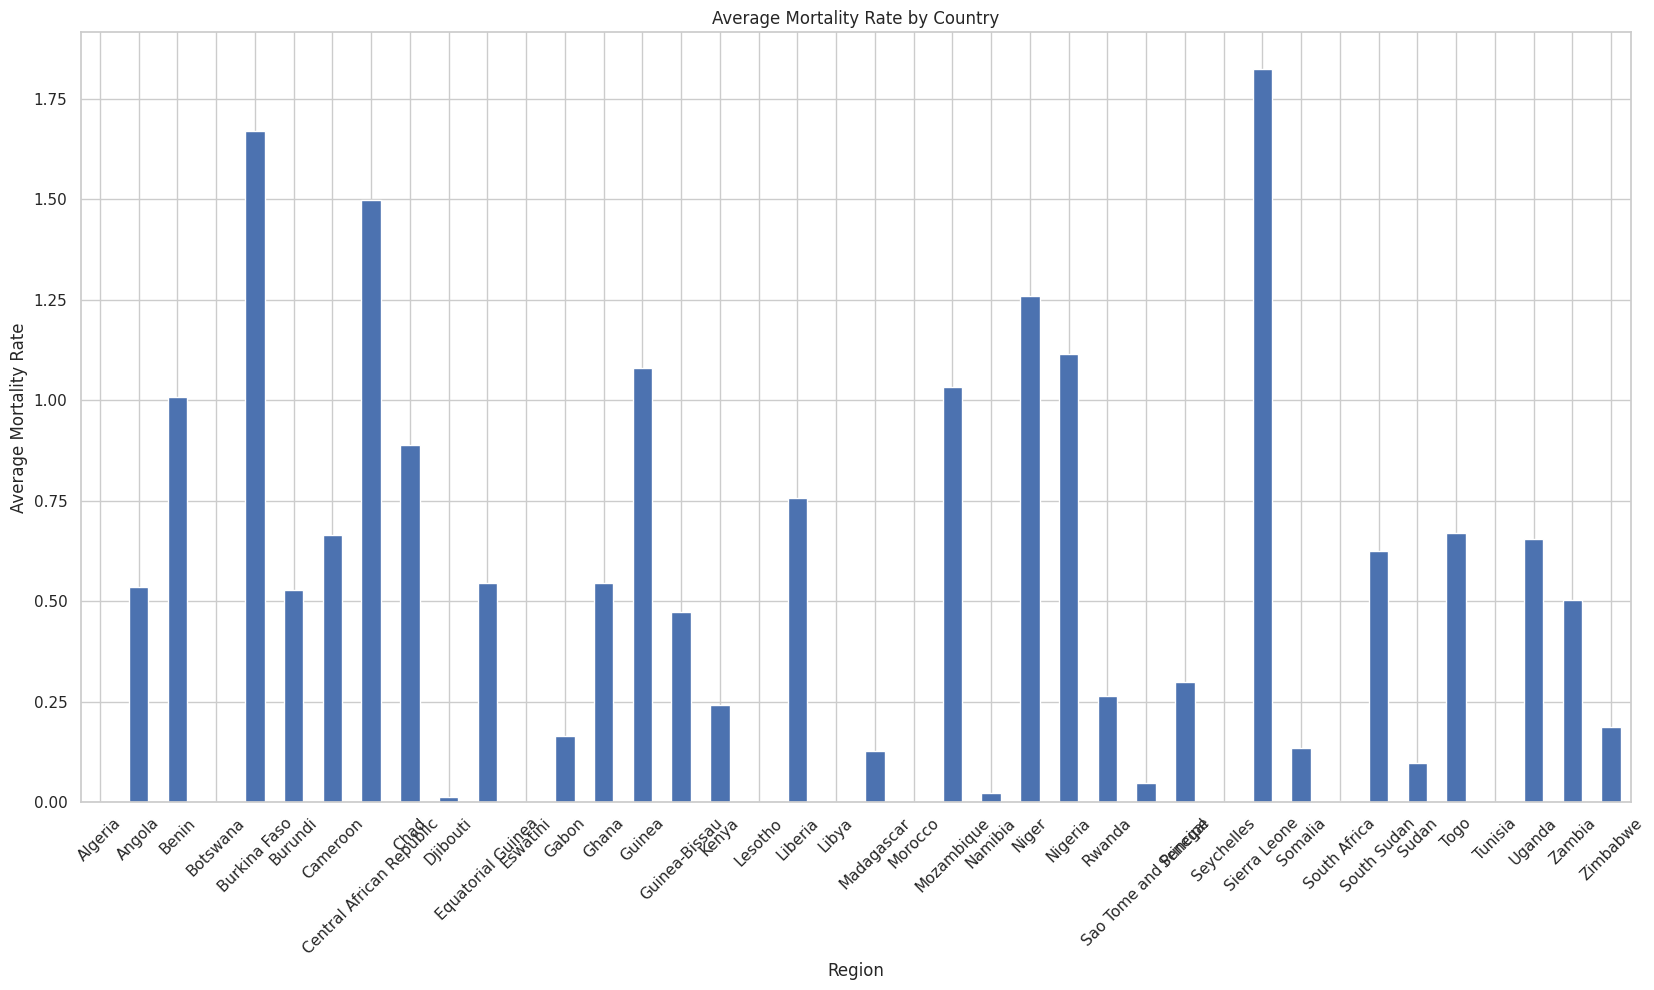

In [177]:
# Regional Comparison
region_mortality = sorted_merged_gdf.groupby('Country Name_right')['Mortality Rate'].mean()
region_mortality.plot(kind='bar', figsize=(20, 10))
plt.title('Average Mortality Rate by Country')
plt.xlabel('Region')
plt.ylabel('Average Mortality Rate')
plt.xticks(rotation=45)
plt.show()

Averagely, Sierra leone has the highest mortality rate followed by Burkina Faso and Cameroon

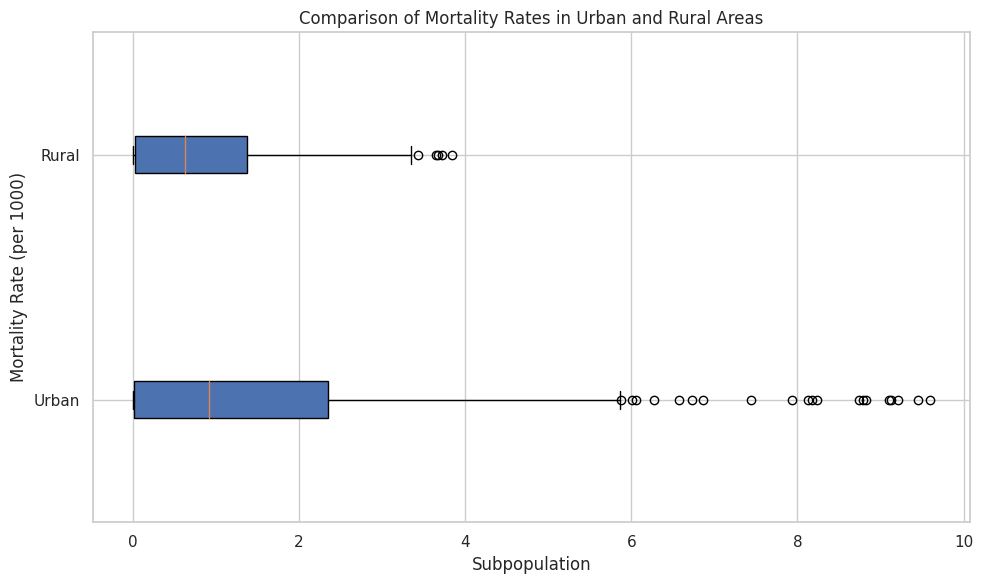

In [178]:
# Calculate mortality rates for rural and urban populations
sorted_merged_gdf['Mortality Rate Urban'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Urban Population'] * 1000
sorted_merged_gdf['Mortality Rate Rural'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Rural Population'] * 1000

# Create a box plot to compare mortality rates
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot([sorted_merged_gdf['Mortality Rate Urban'], sorted_merged_gdf['Mortality Rate Rural']],
                       vert=False, labels=['Urban', 'Rural'], patch_artist=True)

# Add a title and axis labels
plt.title('Comparison of Mortality Rates in Urban and Rural Areas')
plt.xlabel('Subpopulation')
plt.ylabel('Mortality Rate (per 1000)')

# Show the plot
plt.tight_layout()
plt.show()

There are more mortality rates in the urban areas than in the rural population

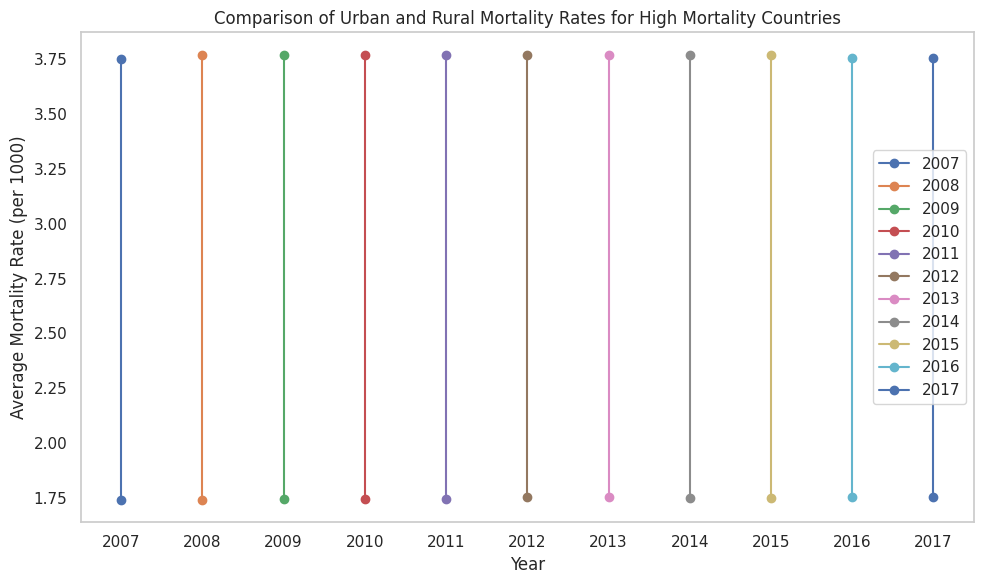

In [179]:
# Calculate Mortality Rates for Urban and Rural Populations
sorted_merged_gdf['Mortality Rate Urban'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Urban Population'] * 1000
sorted_merged_gdf['Mortality Rate Rural'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Rural Population'] * 1000

# Define percentiles for classification
percentiles = [0.33, 0.66]

# Initialize dictionaries to store country classifications
classifications_urban = {}
classifications_rural = {}

# Classify countries based on urban and rural mortality rates
for year in sorted_merged_gdf['Year'].dt.year.unique():
    # Calculate percentiles for the current year
    percentiles_values_urban = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Urban'].quantile(percentiles)
    percentiles_values_rural = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Rural'].quantile(percentiles)

    year_classifications_urban = {}
    year_classifications_rural = {}

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year].iterrows():
        # Classify countries based on urban mortality rates
        if row['Mortality Rate Urban'] < percentiles_values_urban.iloc[0]:
            category_urban = 'Low'
        elif row['Mortality Rate Urban'] > percentiles_values_urban.iloc[1]:
            category_urban = 'High'
        else:
            category_urban = 'Medium'

        # Classify countries based on rural mortality rates
        if row['Mortality Rate Rural'] < percentiles_values_rural.iloc[0]:
            category_rural = 'Low'
        elif row['Mortality Rate Rural'] > percentiles_values_rural.iloc[1]:
            category_rural = 'High'
        else:
            category_rural = 'Medium'

        year_classifications_urban[row['Country Name_right']] = category_urban
        year_classifications_rural[row['Country Name_right']] = category_rural

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications_urban[year_str] = year_classifications_urban
    classifications_rural[year_str] = year_classifications_rural

# Create dictionaries to store countries in different categories across years for Urban and Rural Mortality Rates
high_countries_urban = {}
high_countries_rural = {}

for year, year_classifications in classifications_urban.items():
    high_countries_urban[year] = [country for country, category in year_classifications.items() if category == 'High']

for year, year_classifications in classifications_rural.items():
    high_countries_rural[year] = [country for country, category in year_classifications.items() if category == 'High']

# Visualize the data using line plots with markers
years = sorted_merged_gdf['Year'].dt.year.unique()

plt.figure(figsize=(10, 6))

for year in years:
    high_mortality_urban = high_countries_urban[str(year)]
    high_mortality_rural = high_countries_rural[str(year)]

    high_mortality_data_urban = sorted_merged_gdf[sorted_merged_gdf['Country Name_right'].isin(high_mortality_urban)]
    high_mortality_data_rural = sorted_merged_gdf[sorted_merged_gdf['Country Name_right'].isin(high_mortality_rural)]

    plt.plot([year, year], [high_mortality_data_urban['Mortality Rate Urban'].mean(), high_mortality_data_rural['Mortality Rate Rural'].mean()], marker='o', label=str(year))

plt.title('Comparison of Urban and Rural Mortality Rates for High Mortality Countries')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate (per 1000)')
plt.legend()
plt.xticks(years)
plt.grid()
plt.tight_layout()
plt.show()

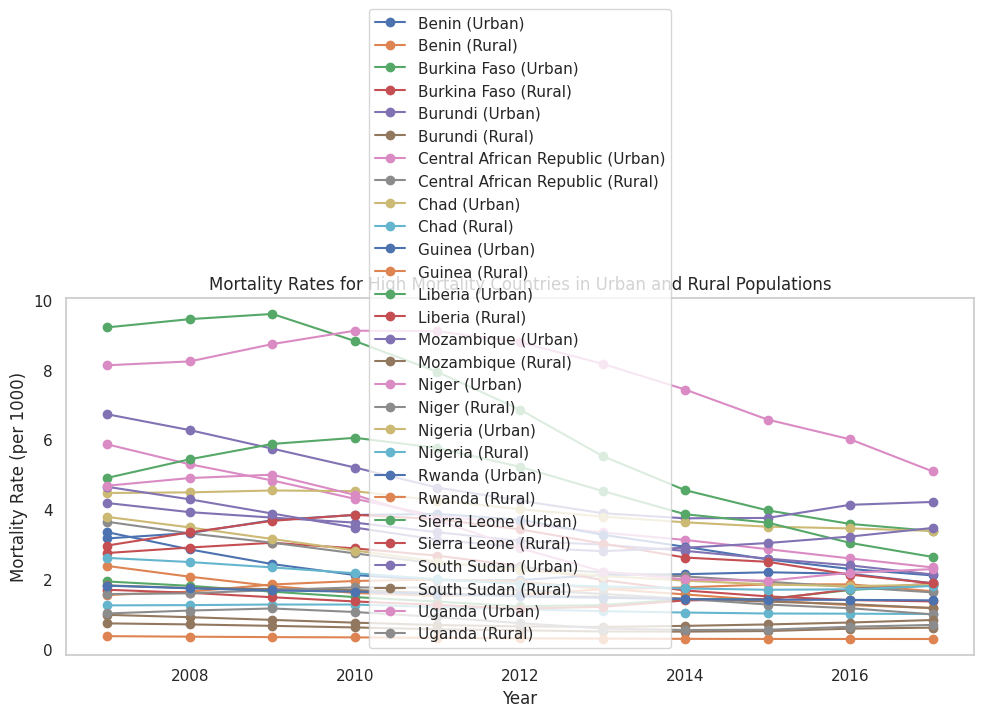

In [180]:
# Calculate Mortality Rates for Urban and Rural Populations
sorted_merged_gdf['Mortality Rate Urban'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Urban Population'] * 1000
sorted_merged_gdf['Mortality Rate Rural'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Rural Population'] * 1000

# Define percentiles for classification
percentiles = [0.33, 0.66]

# Initialize dictionaries to store country classifications
classifications_urban = {}
classifications_rural = {}

# Classify countries based on urban and rural mortality rates
for year in sorted_merged_gdf['Year'].dt.year.unique():
    # Calculate percentiles for the current year
    percentiles_values_urban = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Urban'].quantile(percentiles)
    percentiles_values_rural = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Rural'].quantile(percentiles)

    year_classifications_urban = {}
    year_classifications_rural = {}

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year].iterrows():
        # Classify countries based on urban mortality rates
        if row['Mortality Rate Urban'] < percentiles_values_urban.iloc[0]:
            category_urban = 'Low'
        elif row['Mortality Rate Urban'] > percentiles_values_urban.iloc[1]:
            category_urban = 'High'
        else:
            category_urban = 'Medium'

        # Classify countries based on rural mortality rates
        if row['Mortality Rate Rural'] < percentiles_values_rural.iloc[0]:
            category_rural = 'Low'
        elif row['Mortality Rate Rural'] > percentiles_values_rural.iloc[1]:
            category_rural = 'High'
        else:
            category_rural = 'Medium'

        year_classifications_urban[row['Country Name_right']] = category_urban
        year_classifications_rural[row['Country Name_right']] = category_rural

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications_urban[year_str] = year_classifications_urban
    classifications_rural[year_str] = year_classifications_rural

# Get the list of high mortality countries for both urban and rural populations
high_mortality_countries_urban = high_countries_urban[str(year)]
high_mortality_countries_rural = high_countries_rural[str(year)]

# Visualize the data using line plots for each country
years = sorted_merged_gdf['Year'].dt.year.unique()

plt.figure(figsize=(10, 6))

for country in high_mortality_countries_urban:
    urban_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]
    rural_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]

    plt.plot(years, urban_mortality_data['Mortality Rate Urban'], marker='o', label=f'{country} (Urban)')
    plt.plot(years, rural_mortality_data['Mortality Rate Rural'], marker='o', label=f'{country} (Rural)')

plt.title('Mortality Rates for High Mortality Countries in Urban and Rural Populations')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1000)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

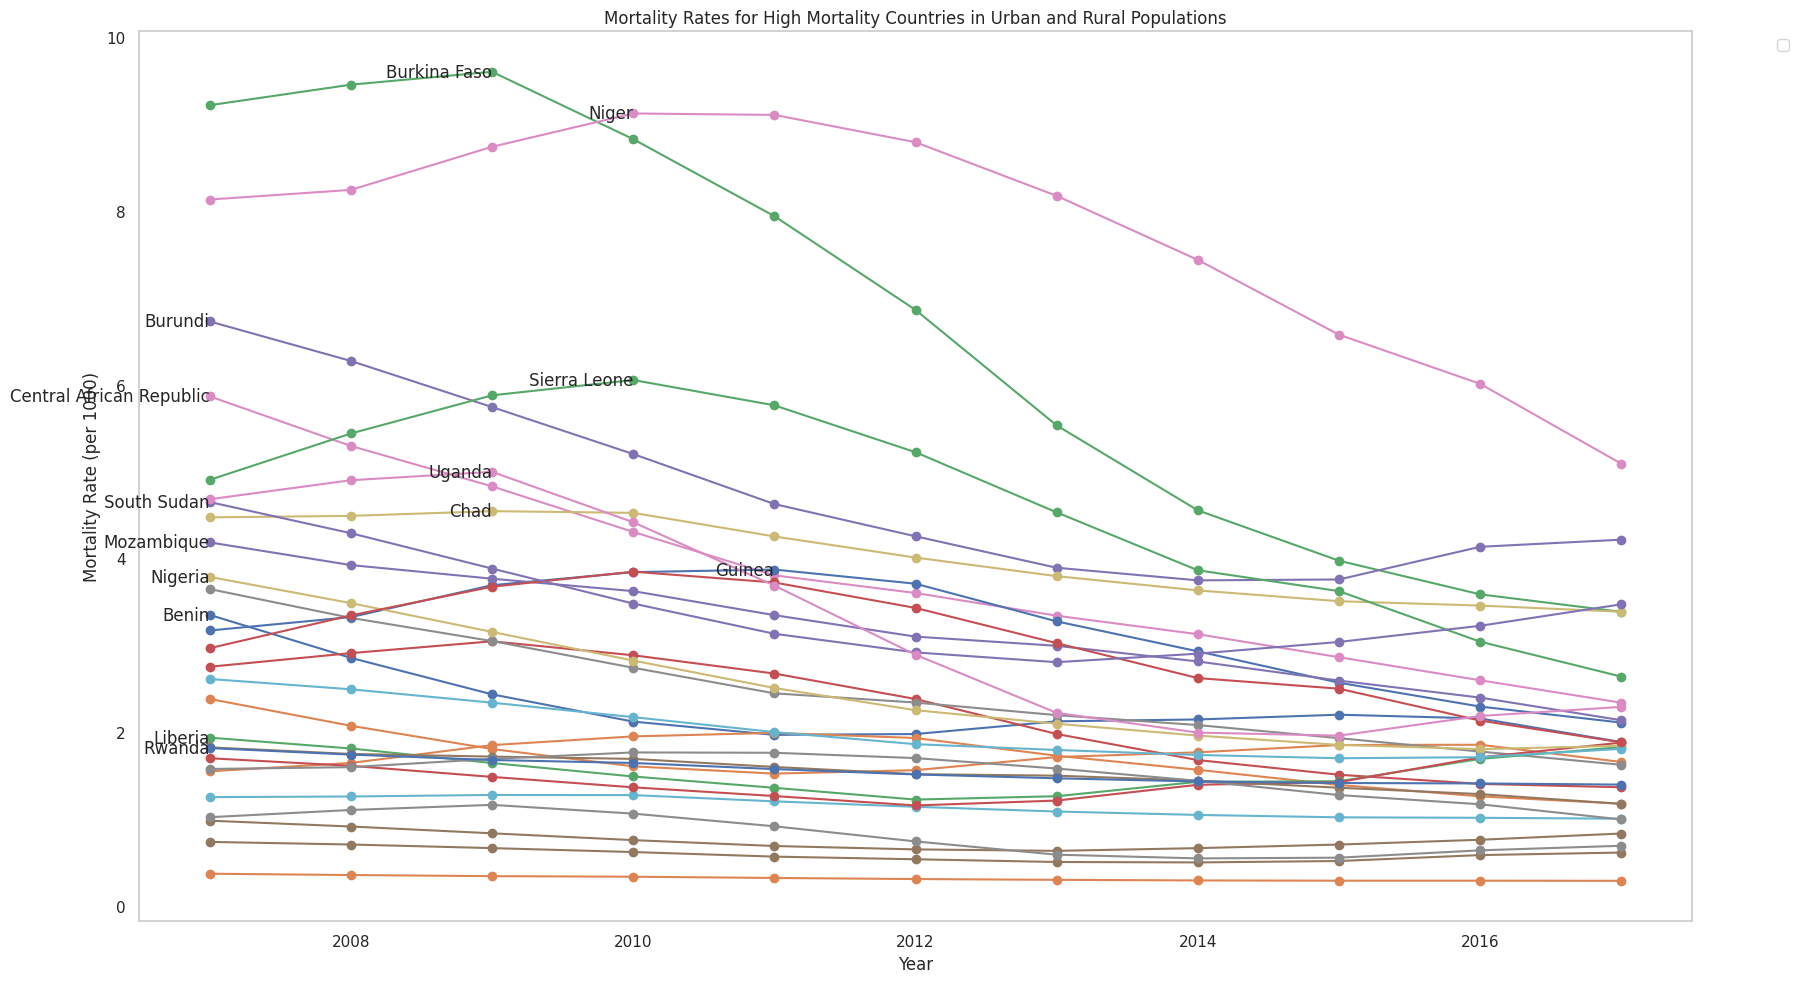

In [181]:
# Adding the high mortality countries for interpretability
# Calculate Mortality Rates for Urban and Rural Populations
sorted_merged_gdf['Mortality Rate Urban'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Urban Population'] * 1000
sorted_merged_gdf['Mortality Rate Rural'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Rural Population'] * 1000

# Define percentiles for classification
percentiles = [0.33, 0.66]

# Initialize dictionaries to store country classifications
classifications_urban = {}
classifications_rural = {}

# Classify countries based on urban and rural mortality rates
for year in sorted_merged_gdf['Year'].dt.year.unique():
    # Calculate percentiles for the current year
    percentiles_values_urban = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Urban'].quantile(percentiles)
    percentiles_values_rural = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Rural'].quantile(percentiles)

    year_classifications_urban = {}
    year_classifications_rural = {}

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year].iterrows():
        # Classify countries based on urban mortality rates
        if row['Mortality Rate Urban'] < percentiles_values_urban.iloc[0]:
            category_urban = 'Low'
        elif row['Mortality Rate Urban'] > percentiles_values_urban.iloc[1]:
            category_urban = 'High'
        else:
            category_urban = 'Medium'

        # Classify countries based on rural mortality rates
        if row['Mortality Rate Rural'] < percentiles_values_rural.iloc[0]:
            category_rural = 'Low'
        elif row['Mortality Rate Rural'] > percentiles_values_rural.iloc[1]:
            category_rural = 'High'
        else:
            category_rural = 'Medium'

        year_classifications_urban[row['Country Name_right']] = category_urban
        year_classifications_rural[row['Country Name_right']] = category_rural

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications_urban[year_str] = year_classifications_urban
    classifications_rural[year_str] = year_classifications_rural

# Get the list of high mortality countries for both urban and rural populations
high_mortality_countries_urban = high_countries_urban[str(year)]
high_mortality_countries_rural = high_countries_rural[str(year)]

# Visualize the data using line plots for each country
years = sorted_merged_gdf['Year'].dt.year.unique()

plt.figure(figsize=(20, 10))

for country in high_mortality_countries_urban:
    urban_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]
    rural_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]

    plt.plot(years, urban_mortality_data['Mortality Rate Urban'], marker='o', label=None)
    plt.plot(years, rural_mortality_data['Mortality Rate Rural'], marker='o', label=None)

    max_mortality = max(max(urban_mortality_data['Mortality Rate Urban']), max(rural_mortality_data['Mortality Rate Rural']))
    max_year = years[np.argmax(np.maximum(urban_mortality_data['Mortality Rate Urban'], rural_mortality_data['Mortality Rate Rural']))]

    plt.text(max_year, max_mortality, f'{country}', ha='right', va='center')

plt.title('Mortality Rates for High Mortality Countries in Urban and Rural Populations')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1000)')
plt.legend(['Urban', 'Rural'])
plt.grid()
plt.tight_layout()

# Place legends outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.85)

plt.show()

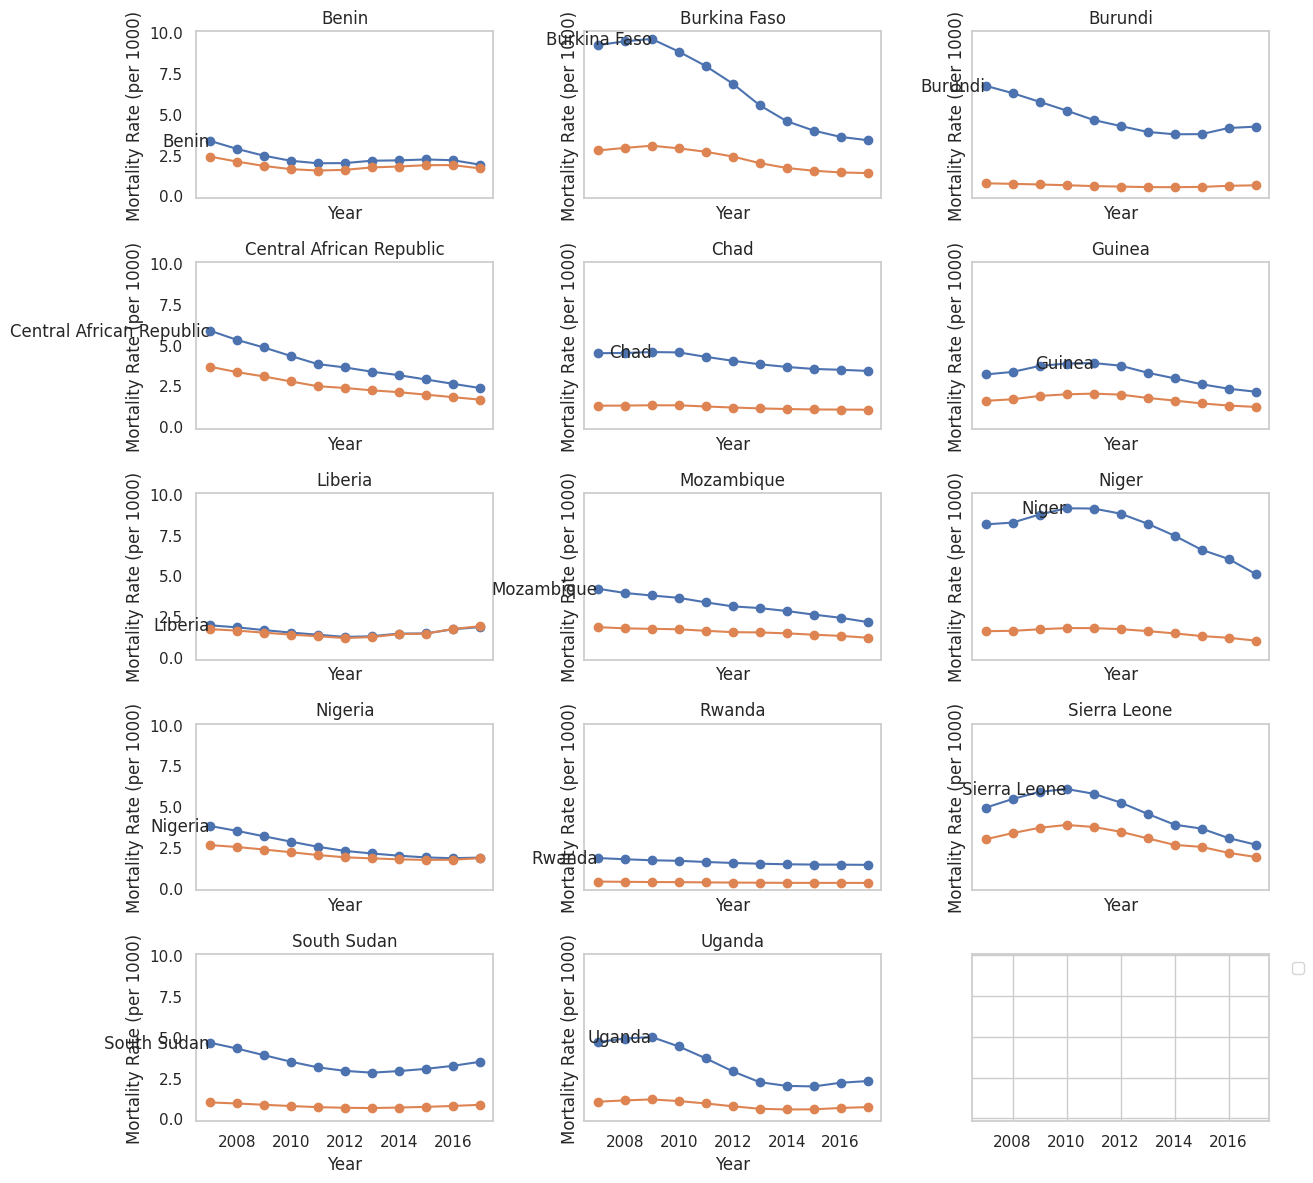

In [182]:
#More intepretability
# Calculate Mortality Rates for Urban and Rural Populations
sorted_merged_gdf['Mortality Rate Urban'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Urban Population'] * 1000
sorted_merged_gdf['Mortality Rate Rural'] = sorted_merged_gdf['Malaria death'] / sorted_merged_gdf['Rural Population'] * 1000

# Define percentiles for classification
percentiles = [0.33, 0.66]

# Initialize dictionaries to store country classifications
classifications_urban = {}
classifications_rural = {}

# Classify countries based on urban and rural mortality rates
for year in sorted_merged_gdf['Year'].dt.year.unique():
    # Calculate percentiles for the current year
    percentiles_values_urban = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Urban'].quantile(percentiles)
    percentiles_values_rural = sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year]['Mortality Rate Rural'].quantile(percentiles)

    year_classifications_urban = {}
    year_classifications_rural = {}

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'].dt.year == year].iterrows():
        # Classify countries based on urban mortality rates
        if row['Mortality Rate Urban'] < percentiles_values_urban.iloc[0]:
            category_urban = 'Low'
        elif row['Mortality Rate Urban'] > percentiles_values_urban.iloc[1]:
            category_urban = 'High'
        else:
            category_urban = 'Medium'

        # Classify countries based on rural mortality rates
        if row['Mortality Rate Rural'] < percentiles_values_rural.iloc[0]:
            category_rural = 'Low'
        elif row['Mortality Rate Rural'] > percentiles_values_rural.iloc[1]:
            category_rural = 'High'
        else:
            category_rural = 'Medium'

        year_classifications_urban[row['Country Name_right']] = category_urban
        year_classifications_rural[row['Country Name_right']] = category_rural

    # Convert the year to a string before using it as a key
    year_str = str(year)
    classifications_urban[year_str] = year_classifications_urban
    classifications_rural[year_str] = year_classifications_rural

# Get the list of high mortality countries for both urban and rural populations
high_mortality_countries_urban = high_countries_urban[str(year)]
high_mortality_countries_rural = high_countries_rural[str(year)]

# Visualize the data using multiple line grids for each country
years = sorted_merged_gdf['Year'].dt.year.unique()

num_countries = len(high_mortality_countries_urban)
num_columns = 3
num_rows = (num_countries + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12), sharex=True, sharey=True)

for i, country in enumerate(high_mortality_countries_urban):
    row = i // num_columns
    col = i % num_columns

    urban_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]
    rural_mortality_data = sorted_merged_gdf[(sorted_merged_gdf['Country Name_right'] == country) & (sorted_merged_gdf['Year'].dt.year.isin(years))]

    ax = axes[row, col]
    ax.plot(years, urban_mortality_data['Mortality Rate Urban'], marker='o', label='Urban')
    ax.plot(years, rural_mortality_data['Mortality Rate Rural'], marker='o', label='Rural')

    max_mortality = max(max(urban_mortality_data['Mortality Rate Urban']), max(rural_mortality_data['Mortality Rate Rural']))
    max_year = years[np.argmax(np.maximum(urban_mortality_data['Mortality Rate Urban'], rural_mortality_data['Mortality Rate Rural']))]

    ax.text(max_year, max_mortality, f'{country}', ha='right', va='center')

    ax.set_title(country)
    ax.grid()
    ax.set_xlabel('Year')
    ax.set_ylabel('Mortality Rate (per 1000)')

# Adjust layout
plt.tight_layout()

# Place legends outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.85)

plt.show()

From here, we can observe the trend of the mortality rates for each countries in both the urban and rural areas decrease over the years which could be as a result of preventive measures used. This will be investigated further

# **Engineering New Features  **-

```

# Case Fatality Rate (%),
Also called Case fatality risk, is the proportion of people who die from a specified disease among all individuals diagnosed with the disease over a certain period of time. It is used as a measure of disease severity and is often used for prognosis (predicting disease course or outcome), where comparatively high rates are indicative of relatively poor outcomes. It is also used to evaluate the effect of new treatments, with measures decreasing as treatments improve. This is also a population dependent metrics used as it varies between populations and over time.

It is given by (Malaria Deaths / Malaria confirmed cases) * 100 This indicates the proportion of reported cases that result in death.

This new feature will be important to understand changes in the severity of malaria incidence cases and the effectiveness of preventive measures.

In [183]:
sorted_merged_gdf.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

In [184]:
df_cases = pd.read_csv('/content/drive/My Drive/Gitlab/cleaned_data (4) (1).csv')

In [185]:
df_cases.fillna(method = 'ffill')

Country Name        Year  \
0         Algeria  2010-01-01   
1          Angola  2010-01-01   
2           Benin  2010-01-01   
3        Botswana  2010-01-01   
4    Burkina Faso  2010-01-01   
..            ...         ...   
283         Sudan  2017-01-01   
284          Togo  2017-01-01   
285        Uganda  2017-01-01   
286        Zambia  2017-01-01   
287      Zimbabwe  2017-01-01   

     Incidence of malaria (per 1,000 population at risk)  \
0                                                 0.00     
1                                               185.52     
2                                               387.76     
3                                                 1.69     
4                                               551.24     
..                                                 ...     
283                                              46.75     
284                                             278.20     
285                                             336.76     
286                                             160.05     
287                                             108.55     

     Malaria cases reported  Malaria death Malaria Confirmed Cases  \
0                       1.0              1                     408   
1                 1682870.0          12398               1 682 870   
2                       0.0           8632               1 682 870   
3                    1046.0              5                   1 046   
4                  804539.0          35034                 804 539   
..                      ...            ...                     ...   
283                720879.0           5230                 800 116   
284               1755577.0           3695               1 756 582   
285              11667831.0          21315              11 667 831   
286               5505639.0           7825               5 505 639   
287                467508.0           3410                 468 276   

     Use of insecticide-treated bed nets (% of under-5 population)  \
0                                              32.8750               
1                                               3.2500               
2                                              29.1000               
3                                              43.8125               
4                                              47.4000               
..                                                 ...               
283                                            59.5000               
284                                            69.7000               
285                                            69.7000               
286                                            69.7000               
287                                            69.7000               

     Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                                  NaN                                         
1                                                  NaN                                         
2                                                  NaN                                         
3                                                  NaN                                         
4                                                 35.1                                         
..                                                 ...                                         
283                                                4.7                                         
284                                               31.1                                         
285                                               31.1                                         
286                                               31.1                                         
287                                               31.1                                         

     Intermittent preventive treatment (IPT) of mala

In [186]:
df_cases.isnull().sum()
df_cases.fillna(0)

Country Name        Year  \
0         Algeria  2010-01-01   
1          Angola  2010-01-01   
2           Benin  2010-01-01   
3        Botswana  2010-01-01   
4    Burkina Faso  2010-01-01   
..            ...         ...   
283         Sudan  2017-01-01   
284          Togo  2017-01-01   
285        Uganda  2017-01-01   
286        Zambia  2017-01-01   
287      Zimbabwe  2017-01-01   

     Incidence of malaria (per 1,000 population at risk)  \
0                                                 0.00     
1                                               185.52     
2                                               387.76     
3                                                 1.69     
4                                               551.24     
..                                                 ...     
283                                              46.75     
284                                             278.20     
285                                             336.76     
286                                             160.05     
287                                             108.55     

     Malaria cases reported  Malaria death Malaria Confirmed Cases  \
0                       1.0              1                     408   
1                 1682870.0          12398               1 682 870   
2                       0.0           8632               1 682 870   
3                    1046.0              5                   1 046   
4                  804539.0          35034                 804 539   
..                      ...            ...                     ...   
283                720879.0           5230                 800 116   
284               1755577.0           3695               1 756 582   
285              11667831.0          21315              11 667 831   
286               5505639.0           7825               5 505 639   
287                467508.0           3410                 468 276   

     Use of insecticide-treated bed nets (% of under-5 population)  \
0                                              32.8750               
1                                               3.2500               
2                                              29.1000               
3                                              43.8125               
4                                              47.4000               
..                                                 ...               
283                                            59.5000               
284                                            69.7000               
285                                            69.7000               
286                                            69.7000               
287                                            69.7000               

     Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                                  0.0                                         
1                                                  0.0                                         
2                                                  0.0                                         
3                                                  0.0                                         
4                                                 35.1                                         
..                                                 ...                                         
283                                                4.7                                         
284                                               31.1                                         
285                                               31.1                                         
286                                               31.1                                         
287                                               31.1                                         

     Intermittent preventive treatment (IPT) of mala

In [187]:
#Preprocessing
# Remove non-numeric characters from the 'Malaria Confirm Cases' column
df_cases['Malaria Confirmed Cases'] = df_cases['Malaria Confirmed Cases'].str.replace(r'\D', '', regex=True)

In [188]:
df_cases['Malaria Confirmed Cases'] = df_cases['Malaria Confirmed Cases'].astype(float)

In [189]:
# Calculate case fatality rate

epsilon = 0.001  # A small constant to avoid dividing by zero
df_cases['Case Fatality Rate (%)'] = (df_cases['Malaria death'] / (df_cases['Malaria Confirmed Cases'])) * 100

# Basic statistics of case fatality rate
print(df_cases['Case Fatality Rate (%)'].describe())

count      288.000000
mean       255.720283
std       2522.536873
min          0.000000
25%          0.333692
50%          0.627827
75%          1.473558
max      28357.446809
Name: Case Fatality Rate (%), dtype: float64


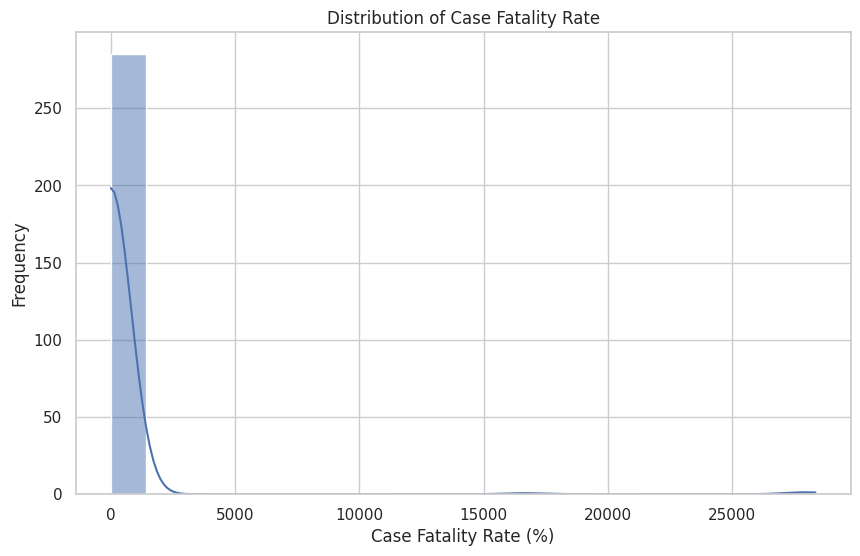

In [190]:
#Create a histogram of case fatality rates
plt.figure(figsize=(10, 6))
sns.histplot(df_cases, x='Case Fatality Rate (%)', bins=20, kde=True)
plt.title('Distribution of Case Fatality Rate')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Frequency')
plt.show()

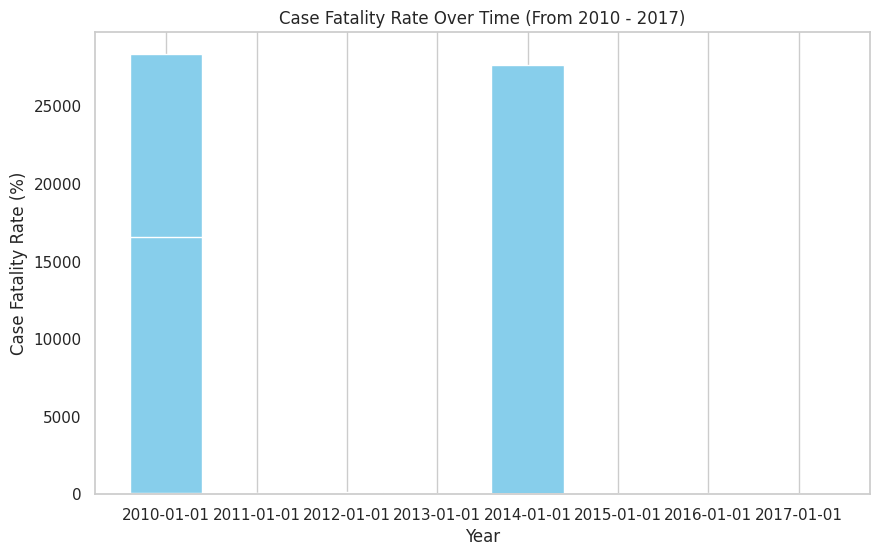

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df_cases['Year'], df_cases['Case Fatality Rate (%)'], color='skyblue')
plt.title('Case Fatality Rate Over Time (From 2010 - 2017)')
plt.xlabel('Year')
plt.ylabel('Case Fatality Rate (%)')
plt.grid(axis='y')
plt.show()

From the barplot above, we can observe that year 2010 and 2014 recorded the highest case fatality rate. Let us investigate further what countries have the highest case fatality.

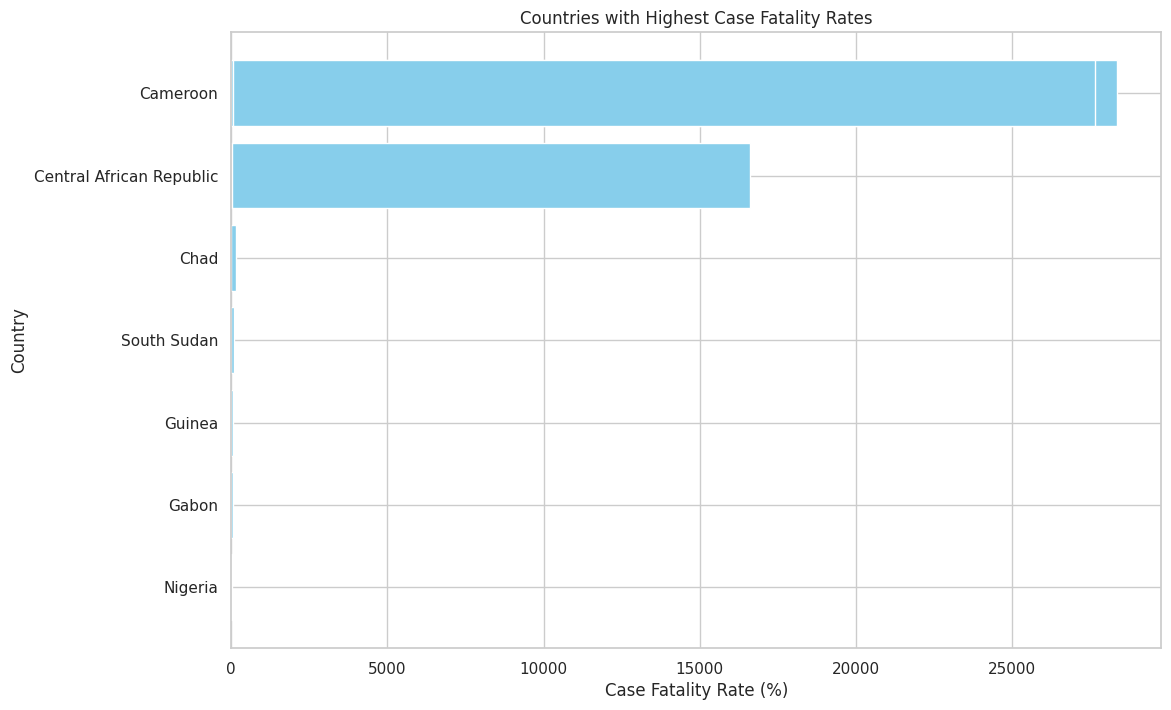

In [192]:
# Get the countries with the highest case fatality rates
top_countries = df_cases.nlargest(10, 'Case Fatality Rate (%)')

plt.figure(figsize=(12, 8))
plt.barh(top_countries['Country Name'], top_countries['Case Fatality Rate (%)'], color='skyblue')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.title('Countries with Highest Case Fatality Rates')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rate on top
plt.show()

The chart above reveal the countries with the highest case fatality rate with Cameroon and Central African Republic, Chad topping the chart

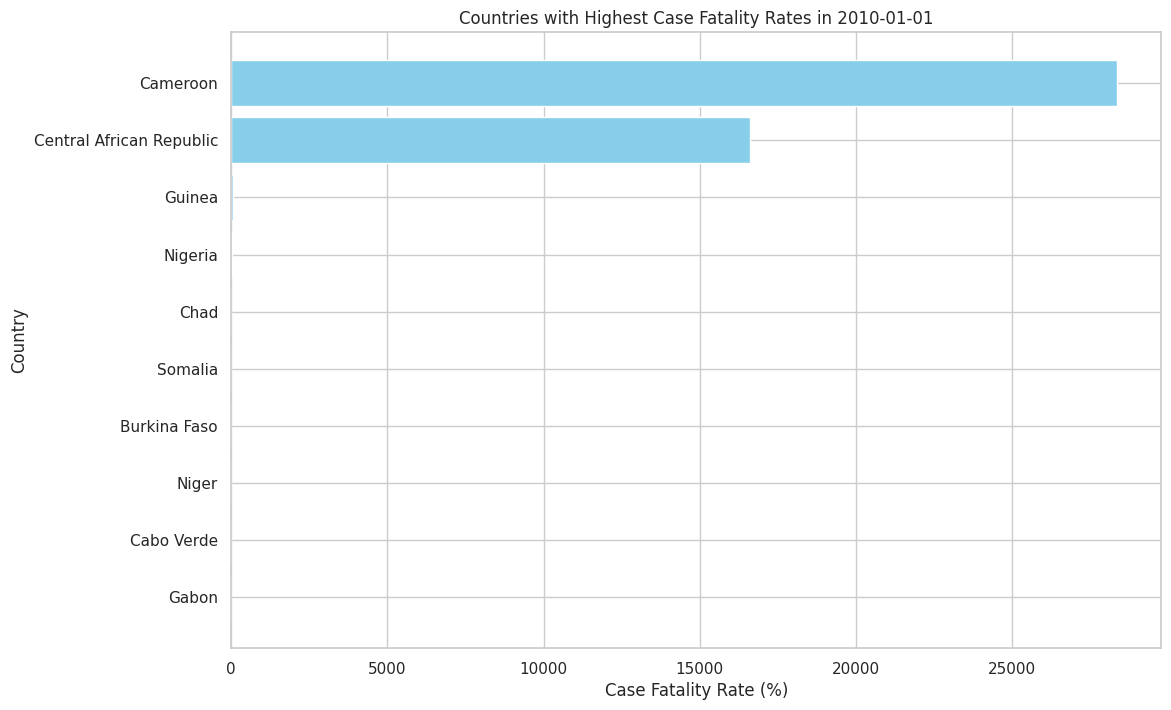

In [193]:
#Let us investigate the years to know which country has the highest case fatality rate in 2010 and 2014
# Choose a specific year
selected_year = '2010-01-01'

# Get the countries with the highest case fatality rates for the selected year
top_countries = df_cases[df_cases['Year'] == selected_year].nlargest(10, 'Case Fatality Rate (%)')

plt.figure(figsize=(12, 8))
plt.barh(top_countries['Country Name'], top_countries['Case Fatality Rate (%)'], color='skyblue')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.title(f'Countries with Highest Case Fatality Rates in {selected_year}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rate on top
plt.show()

The above chart indicates the countries with the highest mortality rate in 2010 with Cameroon 🇨🇲 , Central Africa Republic  and Guinea 🇬🇳  topping the charts

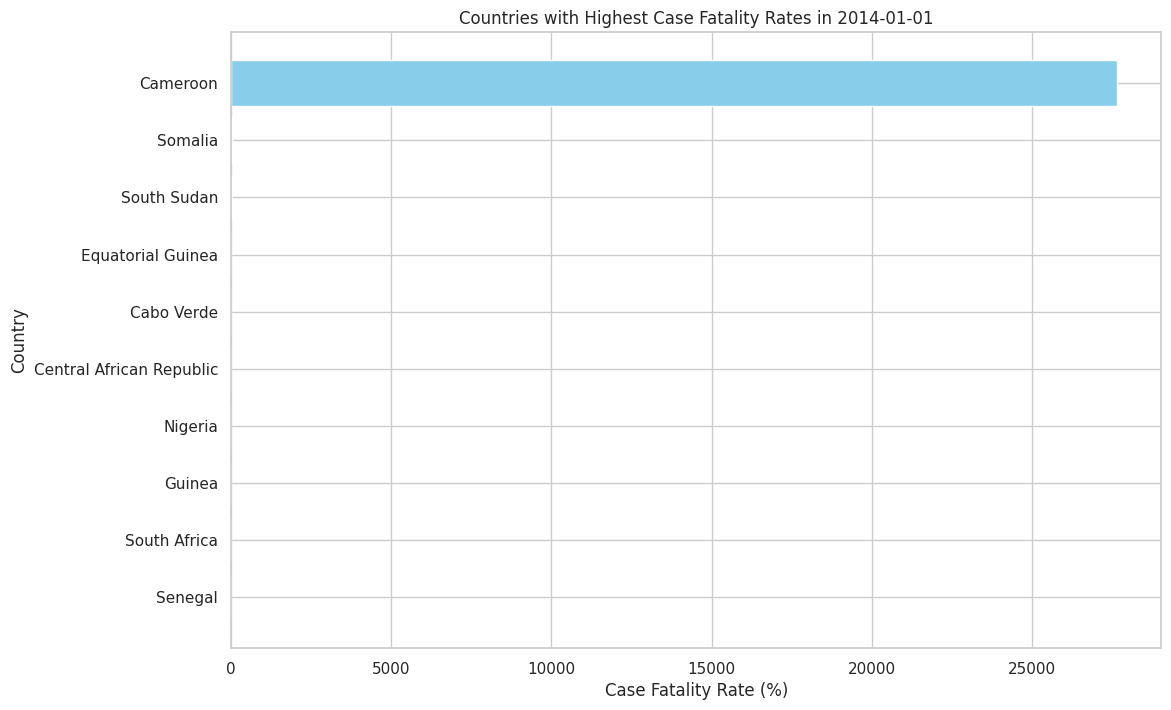

In [194]:
#For 2014
# Choose a specific year
selected_year = '2014-01-01'

# Get the countries with the highest case fatality rates for the selected year
top_countries = df_cases[df_cases['Year'] == selected_year].nlargest(10, 'Case Fatality Rate (%)')

plt.figure(figsize=(12, 8))
plt.barh(top_countries['Country Name'], top_countries['Case Fatality Rate (%)'], color='skyblue')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.title(f'Countries with Highest Case Fatality Rates in {selected_year}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rate on top
plt.show()


From here, it can be seen that Cameroon still has the highest case fatality rate while Central African Republic and Guinea reduced significantly, however, they still remain in the top 10 countries with high case fatality risk.

In [195]:
df_cases.columns

Index(['Country Name', 'Year',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death', 'Malaria Confirmed Cases',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic san

# Let us consider other variables as they relate to the case fatality rate


* We will explore preventive measures (ITN in chidren under age5, IPTp in pregnant women, ACT
*

In [196]:
df_cases.columns

Index(['Country Name', 'Year',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death', 'Malaria Confirmed Cases',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic san

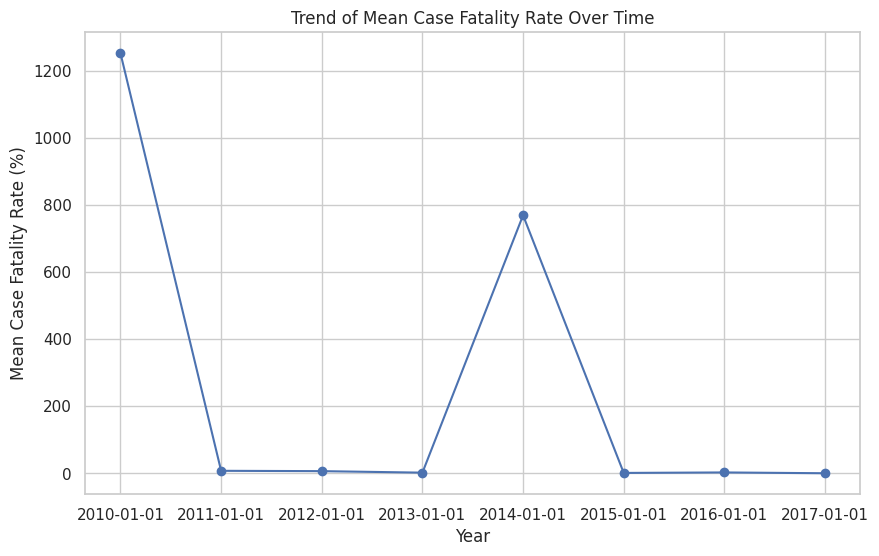

In [197]:

import pandas as pd
import matplotlib.pyplot as plt


# Group data by year and calculate the mean case fatality rate for each year
mean_cfr_by_year = df_cases.groupby('Year')['Case Fatality Rate (%)'].mean()

# Plotting the trend of mean case fatality rate over time
plt.figure(figsize=(10, 6))
plt.plot(mean_cfr_by_year.index, mean_cfr_by_year.values, marker='o')
plt.title('Trend of Mean Case Fatality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Case Fatality Rate (%)')
plt.grid(True)
plt.show()

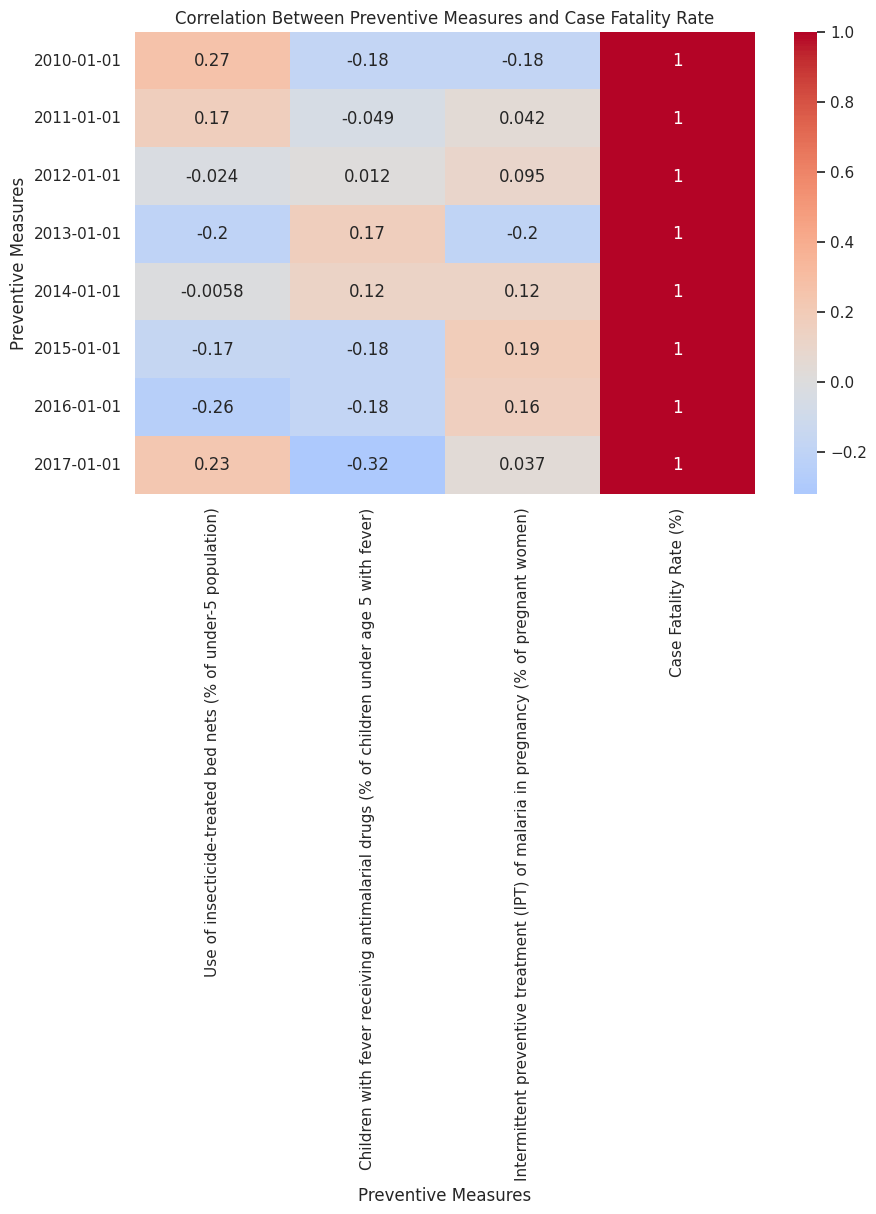

In [198]:


# List of preventive measures columns
preventive_measures = ['Use of insecticide-treated bed nets (% of under-5 population)',
                      'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
                      'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']

# Calculate correlations between each preventive measure and case fatality rate for the same year
correlation_data = df_cases.groupby('Year')[preventive_measures + ['Case Fatality Rate (%)']].corr()

# Filter correlations with case fatality rate
case_fatality_corr = correlation_data.xs('Case Fatality Rate (%)', level=1)

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(case_fatality_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Preventive Measures and Case Fatality Rate')
plt.xlabel('Preventive Measures')
plt.ylabel('Preventive Measures')
plt.show()

<ipython-input-199-6e818f50bc56>:16: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-199-6e818f50bc56>:18: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



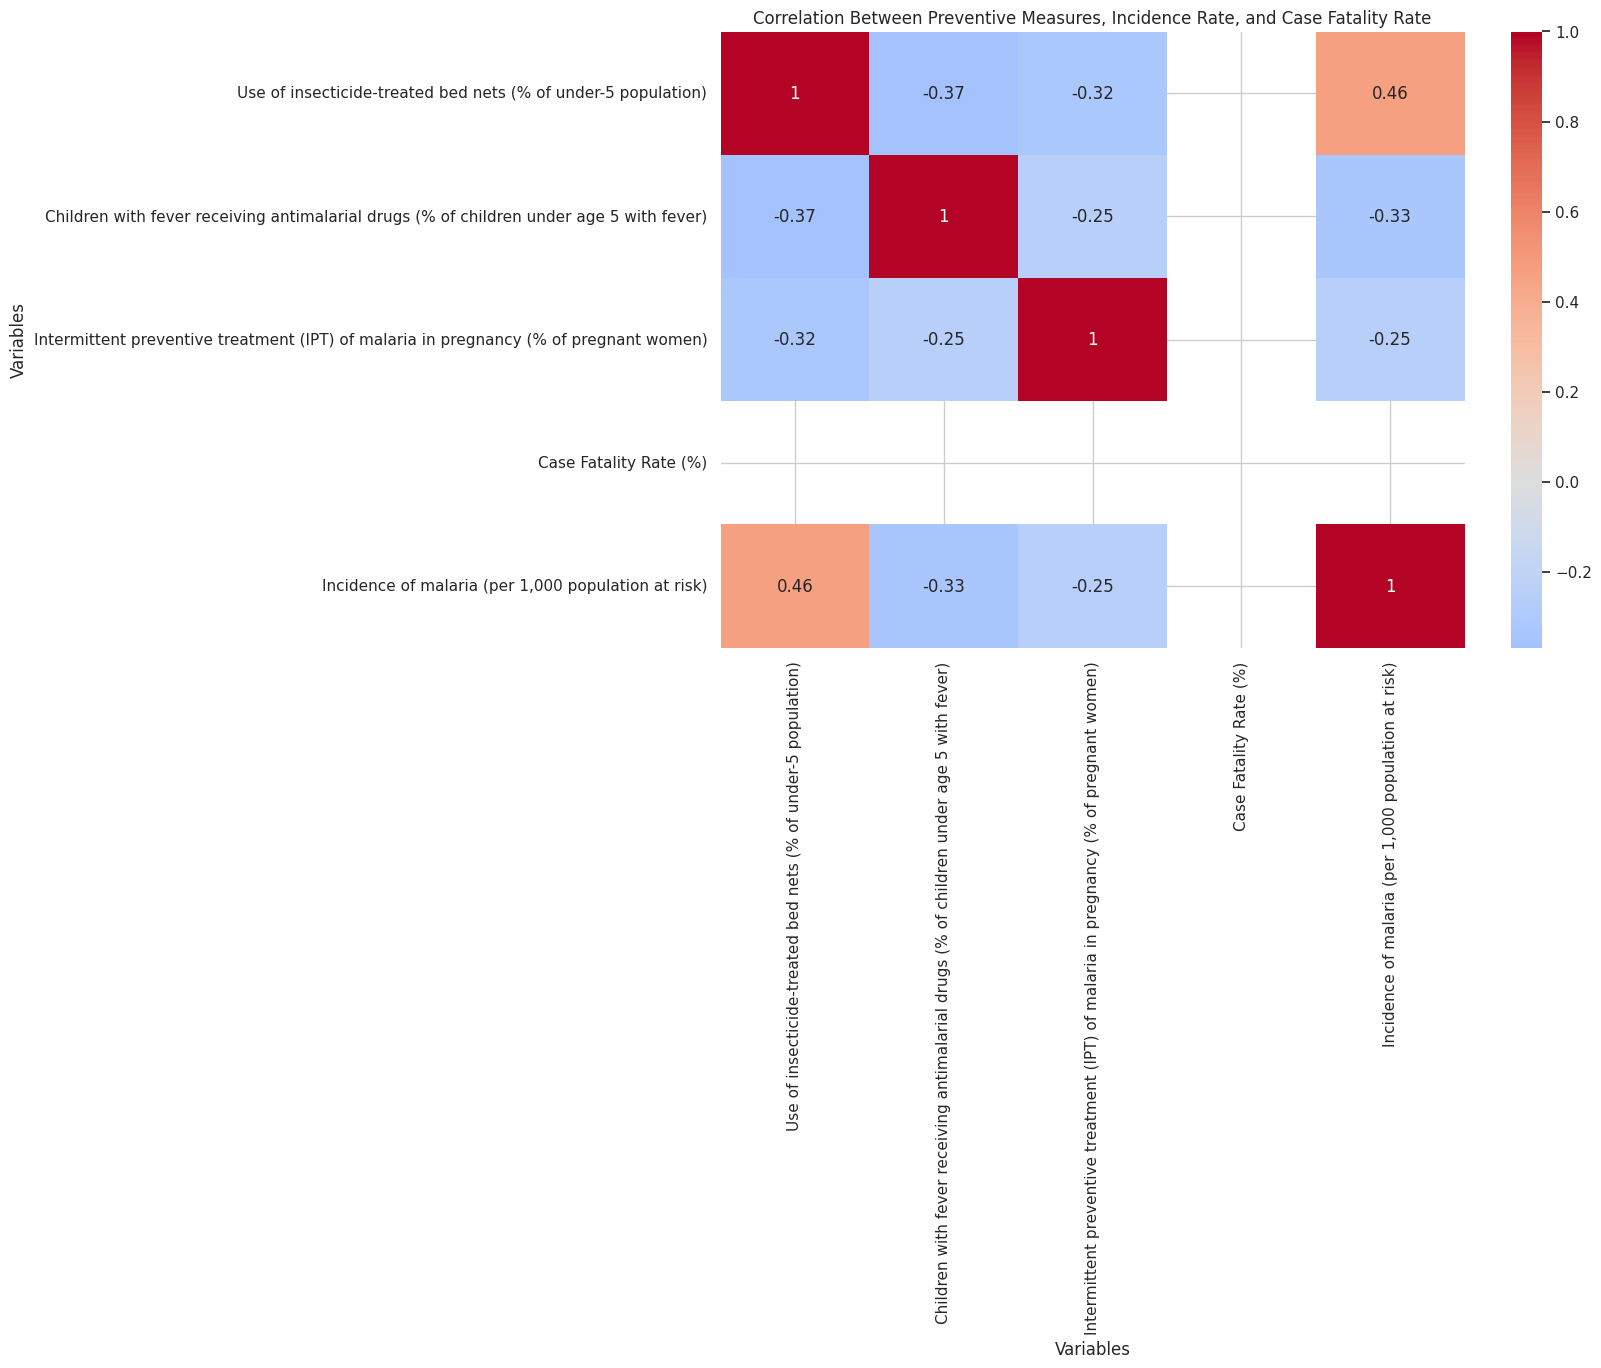

In [199]:


# List of preventive measures columns
preventive_measures = ['Use of insecticide-treated bed nets (% of under-5 population)',
                      'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
                      'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']

# Calculate correlations between each preventive measure and case fatality rate for the same year
correlation_data = df_cases.groupby('Year')[preventive_measures + ['Case Fatality Rate (%)']].corr()

# Filter correlations with case fatality rate
case_fatality_corr = correlation_data.xs('Case Fatality Rate (%)', level=1)

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 8))

# Adding country names and incidence rates to the heatmap
heatmap_data = case_fatality_corr.join(df_cases.groupby('Year')['Country Name', 'Incidence of malaria (per 1,000 population at risk)'].last())

sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Preventive Measures, Incidence Rate, and Case Fatality Rate')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [200]:
sorted_merged_gdf.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

# Spatial analysis

* Spatial clustering : The essence of clustering is to group countries with similar characteristics together on the map. In this case, the clustering is based on the incidence rate of malaria. This will help us to visually compare how incidence rates change across different years

In [201]:

import folium
from folium.plugins import MarkerCluster

# Create a map
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(m)

# Define colors for clusters
cluster_colors = ['blue', 'green', 'red']

# Define the percentiles for classification
percentiles = [0.33, 0.66]  # Adjust the percentiles as needed

for year in sorted_merged_gdf['Year'].unique():
    # Calculate the percentiles for incidence rates for the current year
    incidence_percentiles = sorted_merged_gdf[sorted_merged_gdf['Year'] == year]['Incidence of malaria (per 1,000 population at risk)'].quantile(percentiles)

    for idx, row in sorted_merged_gdf[sorted_merged_gdf['Year'] == year].iterrows():
        if row['Incidence of malaria (per 1,000 population at risk)'] > incidence_percentiles.iloc[1]:
            cluster = 2  # High incidence
        elif row['Incidence of malaria (per 1,000 population at risk)'] < incidence_percentiles.iloc[0]:
            cluster = 0  # Low incidence
        else:
            cluster = 1  # Medium incidence

        popup_html = f"Country: {row['Country Name_right']}<br>Year: {year}<br>Cluster: {cluster}" \
                     f"<br>Incidence Rate: {row['Incidence of malaria (per 1,000 population at risk)']}" \
                     f"<br>Mortality Rate: {row['Mortality Rate']}"

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=cluster_colors[cluster],
            fill=True,
            fill_color=cluster_colors[cluster],
            fill_opacity=0.7,
            popup=folium.Popup(html=popup_html),
        ).add_to(marker_cluster)

# Add layer control to toggle clustering
folium.LayerControl().add_to(m)

# Display the map in the notebook
m

In [202]:
!pip install libpysal

In [203]:
pip install esda

In [204]:
# Spatial autocorrelation analysis
import libpysal
from esda.moran import Moran

# Calculate spatial weights
w = libpysal.weights.DistanceBand.from_dataframe(sorted_merged_gdf, threshold=200, binary=True)

# Select the columns for analysis
columns_to_analyze = ['Incidence of malaria (per 1,000 population at risk)', 'Mortality Rate', 'Total Malaria Cases', 'Total Population']

# Calculate Moran's I statistic for each column
for column in columns_to_analyze:
    series = sorted_merged_gdf[column]
    moran = Moran(series, w)

    # Interpret the Moran's I result for each column
    print(f"Moran's I for {column}:", moran.I)
    print(f"Expected Moran's I for {column}:", moran.EI)
    print(f"P-value for {column}:", moran.p_norm)
    print(f"Z-score for {column}:", moran.z_norm)
    print("--------------------")

Moran's I for Incidence of malaria (per 1,000 population at risk): -0.0238748319430682
Expected Moran's I for Incidence of malaria (per 1,000 population at risk): -0.002277904328018223
P-value for Incidence of malaria (per 1,000 population at risk): 0.0
Z-score for Incidence of malaria (per 1,000 population at risk): -43.96054801057853
--------------------
Moran's I for Mortality Rate: -0.02351543163045032
Expected Moran's I for Mortality Rate: -0.002277904328018223
P-value for Mortality Rate: 0.0
Z-score for Mortality Rate: -43.228988643456084
--------------------
Moran's I for Total Malaria Cases: -0.025408798683309242
Expected Moran's I for Total Malaria Cases: -0.002277904328018223
P-value for Total Malaria Cases: 0.0
Z-score for Total Malaria Cases: -47.08293744174952
--------------------
Moran's I for Total Population: -0.025394833203846393
Expected Moran's I for Total Population: -0.002277904328018223
P-value for Total Population: 0.0
Z-score for Total Population: -47.0545107071

Moran's I is like a special tool we use to see if the sick people are spread out in a certain way. The number we got for Moran's I is -0.023. This number tells us that the way sick people are spread out on the map is different from what we'd expect if it was just random. It's like if we saw more sick people in some countries close to each other and fewer sick people in others nearby.

The expected Moran's I is a number that says what we'd expect if the sickness was just happening randomly. In this case, that number is -0.002. So, the actual way the sickness is spread out is quite different from what we'd expect if it was just random.

The p-value is like a special test that tells us if our findings are strong or not. The p-value here is very close to zero, which means our findings are super strong. It's like we found a really important clue that says the way malaria is spreading in Africa isn't just by chance.

The Z-score is another number that helps us understand how different our findings are from random.

So, all these numbers together tell us that the way malaria is spreading in African countries is not random. There's a special pattern to it, and we need to figure out why some places have more sick people while others nearby have fewer (probably a future research direction).




In [205]:
!pip install splot

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




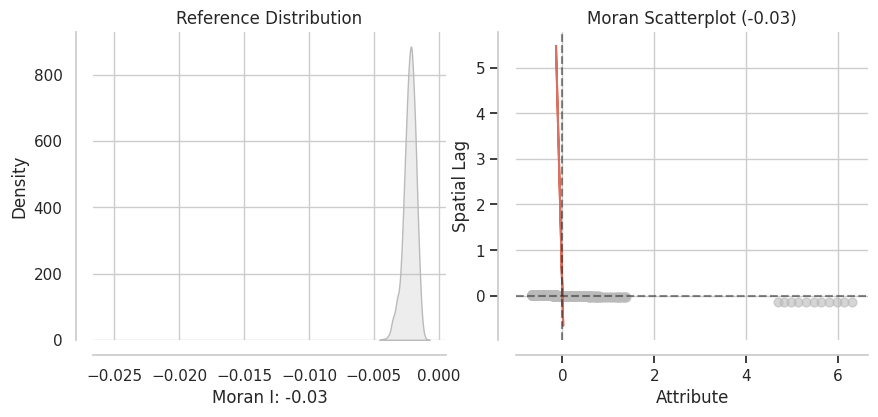

In [206]:

from splot.esda import moran_scatterplot, plot_moran

plot_moran(moran, zstandard=True, aspect_equal=False)
plt.show()

In [207]:
!pip install pysal

In [208]:

pip install geopandas esda libpysal

Hotspot analysis

In [209]:

import libpysal

from esda import G_Local


# Calculate Getis-Ord Gi* statistic
incidence_rate = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)']

# Create a spatial weights matrix (w) using libpysal
w = libpysal.weights.Queen.from_dataframe(sorted_merged_gdf)

# Check if the dimensions match between incidence_rate and w
if len(incidence_rate) == w.n:
    # Calculate Getis-Ord Gi* statistic
    getis_ord = G_Local(incidence_rate, w, star=True)

    # Extract Gi* statistics and p-values
    gi_star_values = getis_ord.Gs
    p_values = getis_ord.p_sim

    # Print or use the results as needed
    print("Gi* Values:", gi_star_values)
    print("P-values:", p_values)
else:
    print("Dimension mismatch: The length of incidence_rate is not equal to the number of spatial units in the data.")

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 7 disconnected components.

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.



Gi* Values: [0.00221733 0.00161852 0.0047246  0.00070849 0.00464528 0.00241902
 0.0035652  0.00277621 0.00283902 0.00029192 0.00334784 0.00149438
 0.00334784 0.00475351 0.00311102 0.00213903 0.0020616  0.00043997
 0.00453941 0.00193088 0.00062299 0.         0.00157078 0.0009776
 0.00311211 0.00388625 0.00294098 0.00031504 0.00213903 0.00073784
 0.00453941 0.00048167 0.00094394 0.0026105  0.00210102 0.0049055
 0.00137901 0.00257533 0.001738   0.00157033 0.00221733 0.00161852
 0.0047246  0.00070849 0.00464528 0.00241902 0.0035652  0.00277621
 0.00283902 0.00029192 0.00334784 0.00149438 0.00334784 0.00475351
 0.00311102 0.00213903 0.0020616  0.00043997 0.00453941 0.00193088
 0.00062299 0.         0.00157078 0.0009776  0.00311211 0.00388625
 0.00294098 0.00031504 0.00213903 0.00073784 0.00453941 0.00048167
 0.00094394 0.0026105  0.00210102 0.0049055  0.00137901 0.00257533
 0.001738   0.00157033 0.00221733 0.00161852 0.0047246  0.00070849
 0.00464528 0.00241902 0.0035652  0.00277621 0.00283

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 7 disconnected components.

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 7 disconnected components.

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no defa

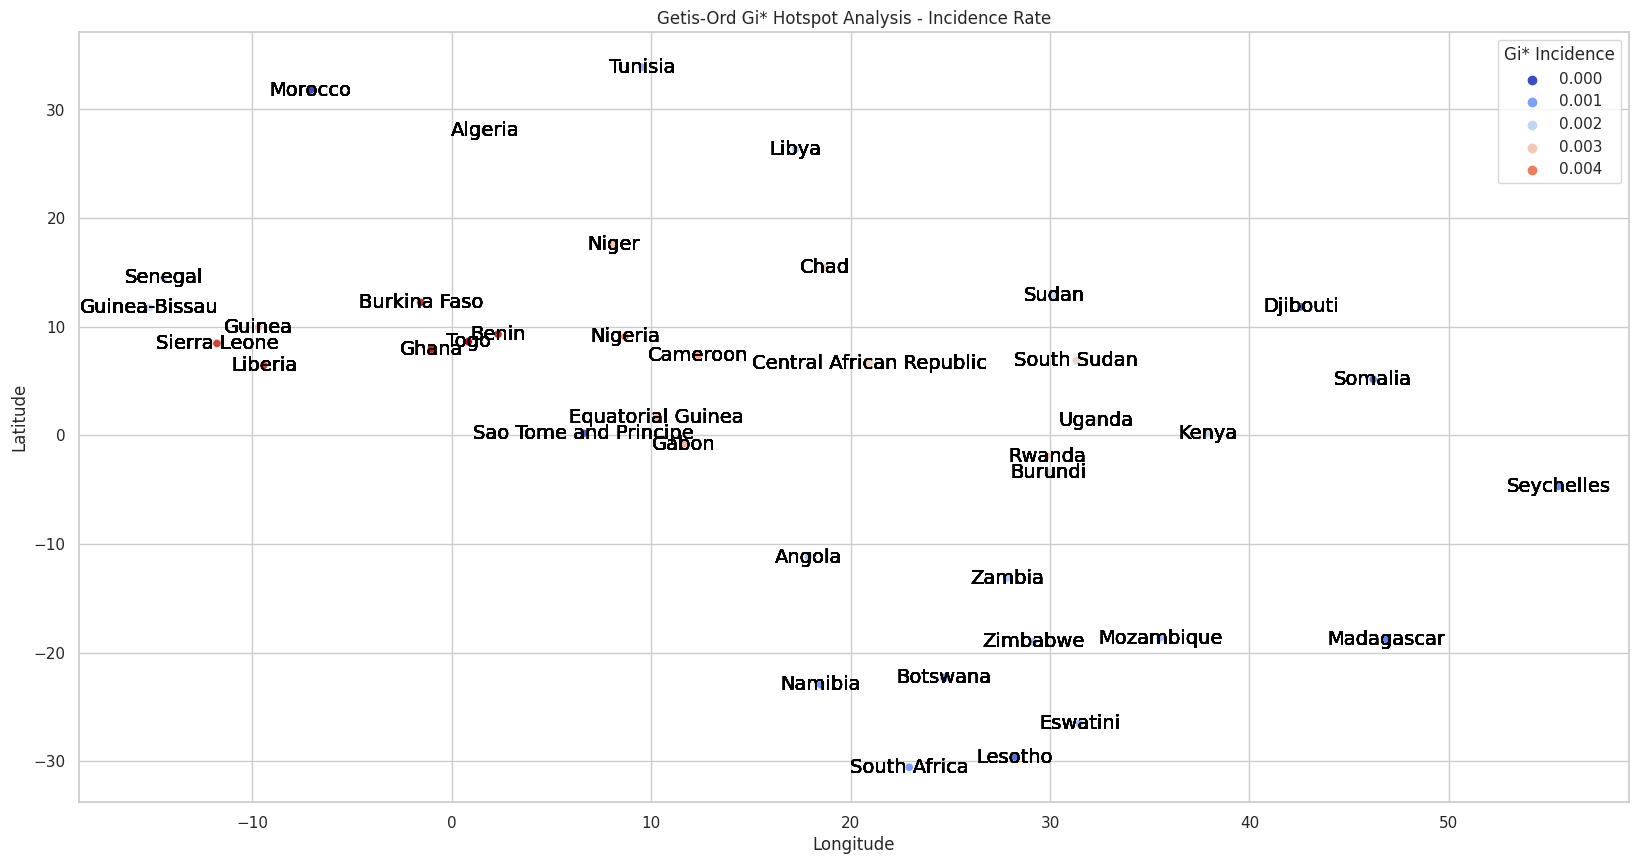

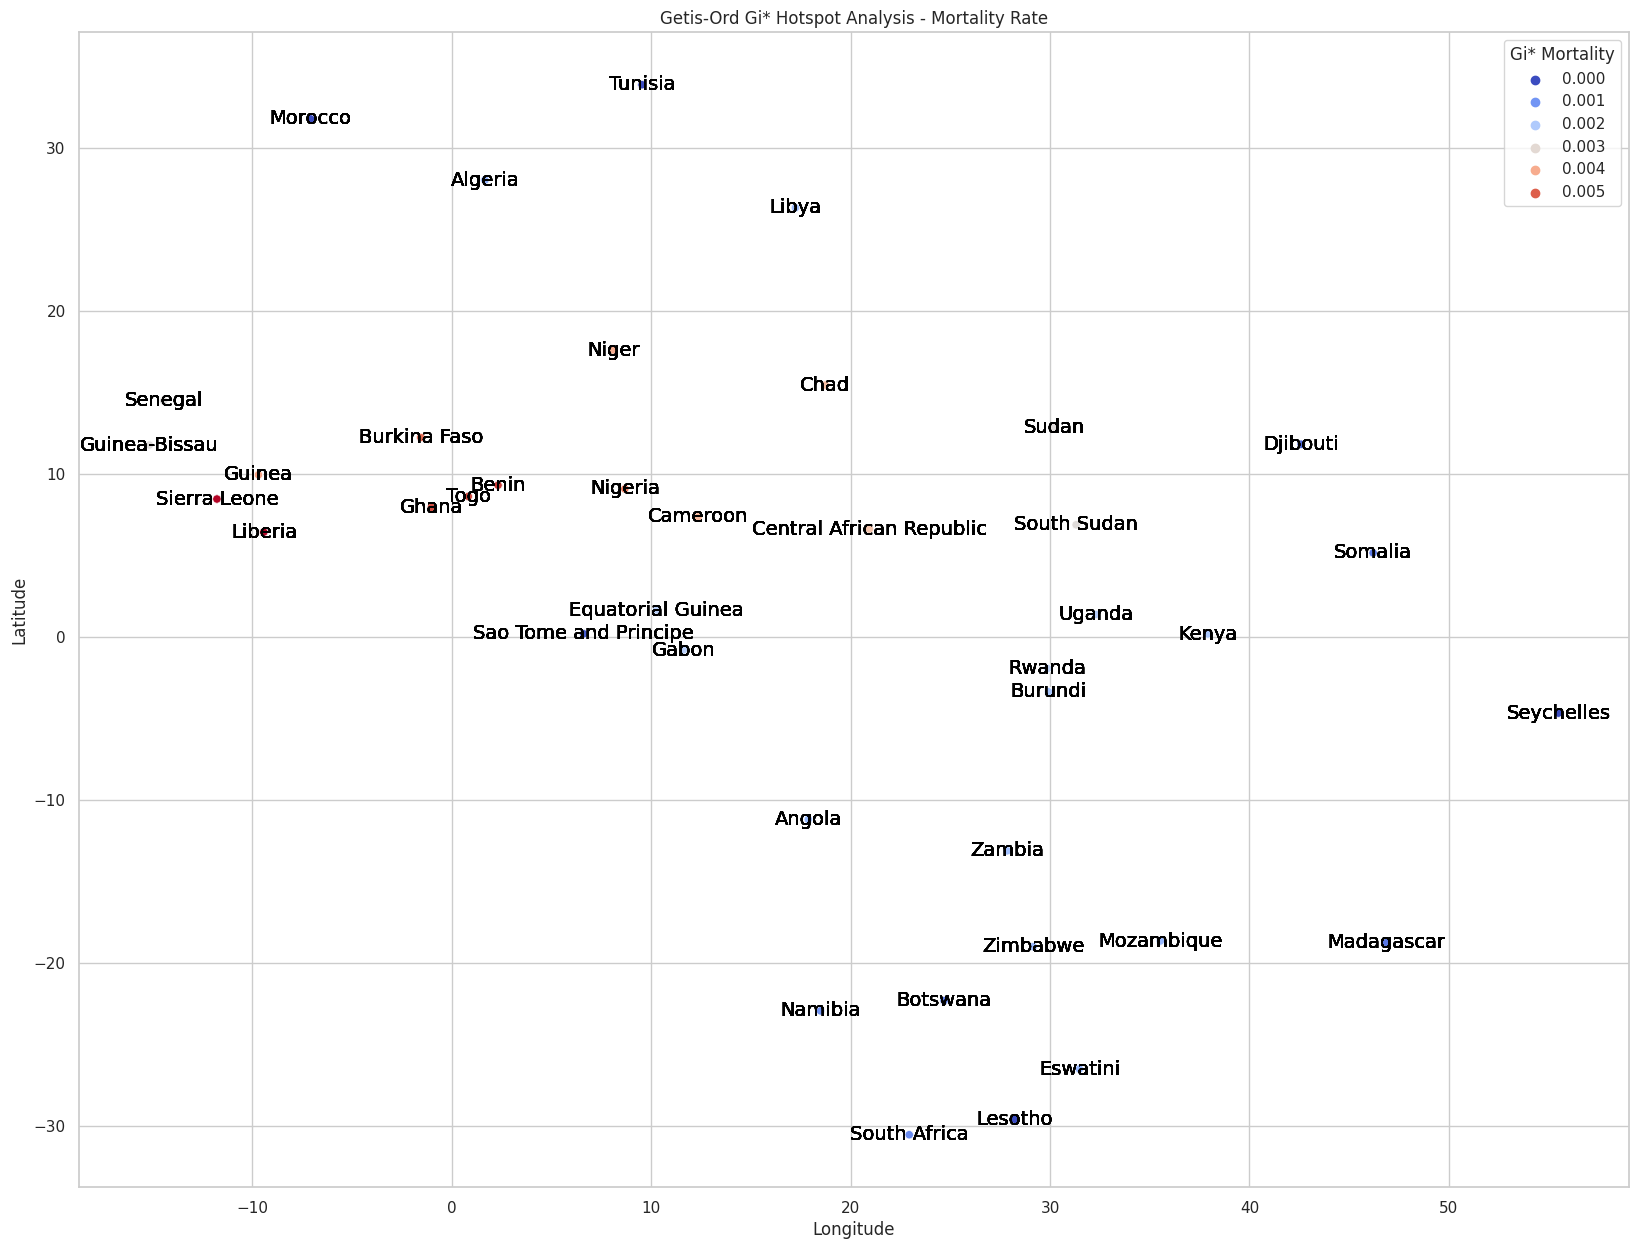

In [210]:

from esda import G_Local

# Calculate Getis-Ord Gi* statistic for incidence rate
incidence_rate = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)']
w = libpysal.weights.Queen.from_dataframe(sorted_merged_gdf)
getis_ord_incidence = G_Local(incidence_rate, w, star=True)
gi_star_incidence = getis_ord_incidence.Gs

# Calculate Getis-Ord Gi* statistic for mortality rate
mortality_rate = sorted_merged_gdf['Mortality Rate']
w_mortality = libpysal.weights.Queen.from_dataframe(sorted_merged_gdf)
getis_ord_mortality = G_Local(mortality_rate, w_mortality, star=True)
gi_star_mortality = getis_ord_mortality.Gs

# Add Gi* values to the GeoDataFrame
sorted_merged_gdf['Gi_Star_Incidence'] = gi_star_incidence
sorted_merged_gdf['Gi_Star_Mortality'] = gi_star_mortality

# Plot hotspot analysis results for incidence rate
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=sorted_merged_gdf, x='longitude', y='latitude', hue='Gi_Star_Incidence', palette='coolwarm', legend='brief')

# Customize plot settings
ax.set_title('Getis-Ord Gi* Hotspot Analysis - Incidence Rate')
ax.legend(title='Gi* Incidence', loc='upper right')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add country labels as bigger text
for index, row in sorted_merged_gdf.iterrows():
    ax.text(row['longitude'], row['latitude'], row['Country Name_right'], fontsize=14, color='black', ha='center', va='center')

plt.show()

# Plot hotspot analysis results for mortality rate
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=sorted_merged_gdf, x='longitude', y='latitude', hue='Gi_Star_Mortality', palette='coolwarm', legend='brief')

# Customize plot settings
ax.set_title('Getis-Ord Gi* Hotspot Analysis - Mortality Rate')
ax.legend(title='Gi* Mortality', loc='upper right')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add country labels as bigger text
for index, row in sorted_merged_gdf.iterrows():
    ax.text(row['longitude'], row['latitude'], row['Country Name_right'], fontsize=14, color='black', ha='center', va='center')

plt.show()

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 4 disconnected components.

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

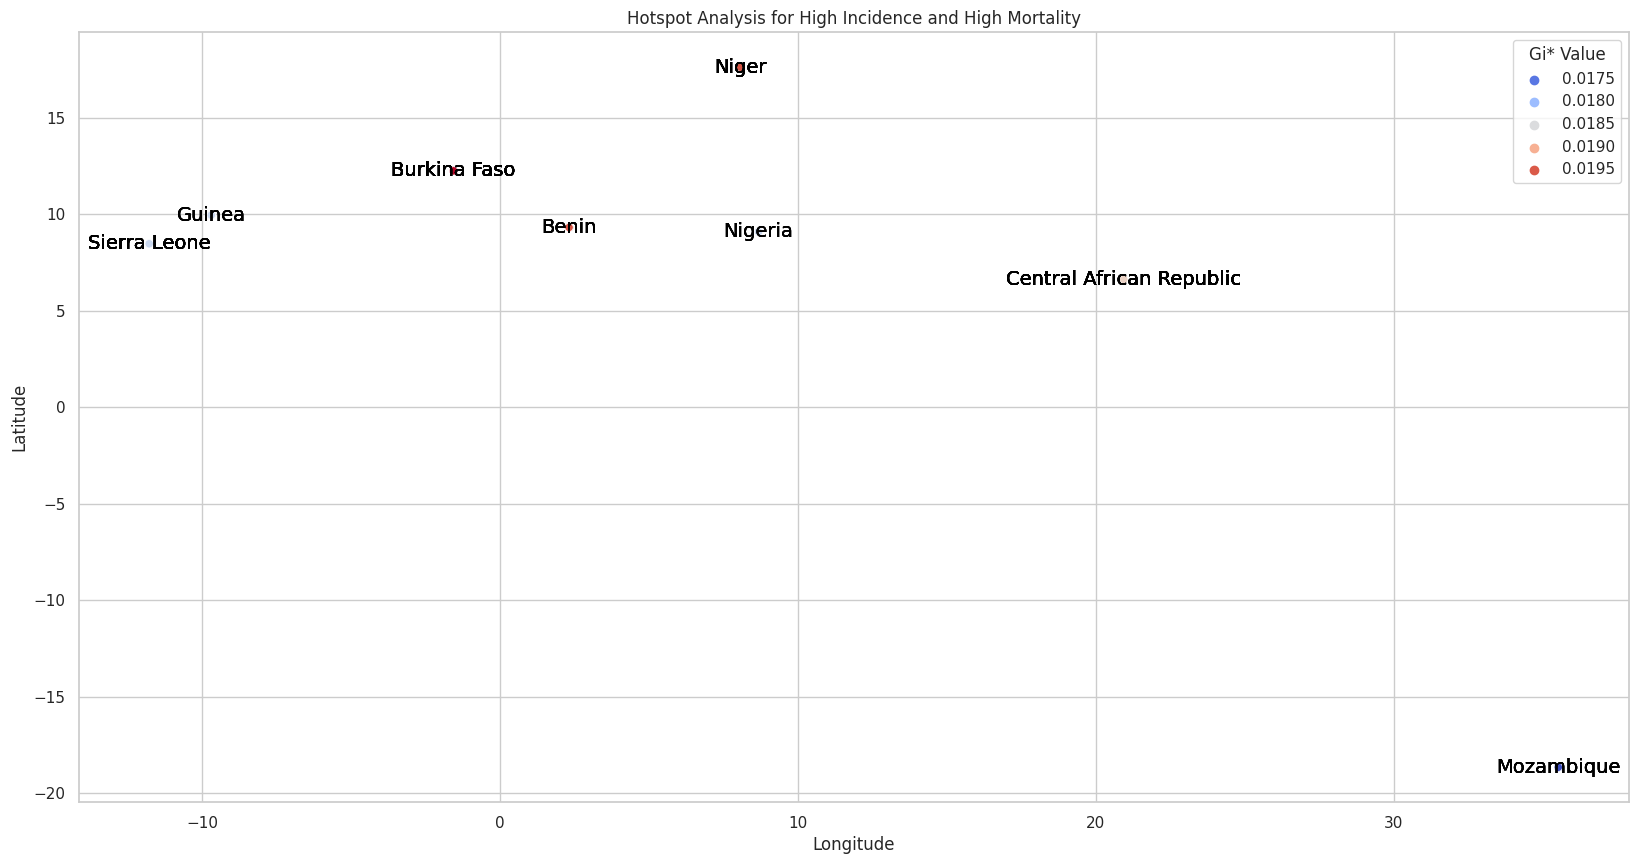

In [211]:

import geopandas as gpd
from esda import G_Local

# Calculate percentiles for incidence rate and mortality rate
incidence_percentile = sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)'].quantile(0.85)
mortality_percentile = sorted_merged_gdf['Mortality Rate'].quantile(0.85)

# Filter data based on percentiles
high_incidence_mortality = sorted_merged_gdf[
    (sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)'] > incidence_percentile) &
    (sorted_merged_gdf['Mortality Rate'] > mortality_percentile)
]

# Calculate Getis-Ord Gi* statistic for the filtered data
incidence_rate = high_incidence_mortality['Incidence of malaria (per 1,000 population at risk)']
w = libpysal.weights.Queen.from_dataframe(high_incidence_mortality)
getis_ord = G_Local(incidence_rate, w, star=True)
gi_star_values = getis_ord.Gs

# Add Gi* values to the GeoDataFrame
high_incidence_mortality['Gi_Star'] = gi_star_values

# Plot hotspot analysis results
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=high_incidence_mortality, x='longitude', y='latitude', hue='Gi_Star', palette='coolwarm', legend='brief')

# Customize plot settings
ax.set_title('Hotspot Analysis for High Incidence and High Mortality')
ax.legend(title='Gi* Value', loc='upper right')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add country labels as bigger text
for index, row in high_incidence_mortality.iterrows():
    ax.text(row['longitude'], row['latitude'], row['Country Name_right'], fontsize=14, color='black', ha='center', va='center')

plt.show()

In [212]:

from esda import G_Local
import folium
from folium.plugins import MarkerCluster

# Calculate Getis-Ord Gi* statistic
incidence_rate = sorted_merged_gdf['Standardized Incidence Rate']

# Create a spatial weights matrix (w) using libpysal
w = libpysal.weights.Queen.from_dataframe(sorted_merged_gdf)

# Check if the dimensions match between incidence_rate and w
if len(incidence_rate) == w.n:
    # Calculate Getis-Ord Gi* statistic
    getis_ord = G_Local(incidence_rate, w, star=True)

    # Extract Gi* statistics and p-values
    gi_star_values = getis_ord.Gs

    # Add Gi* values to the GeoDataFrame
    sorted_merged_gdf['Gi_Star'] = gi_star_values

    # Create an interactive map using Folium
    m = folium.Map(location=[sorted_merged_gdf['latitude'].mean(), sorted_merged_gdf['longitude'].mean()], zoom_start=4)
    marker_cluster = MarkerCluster().add_to(m)

    for idx, row in sorted_merged_gdf.iterrows():
        folium.Marker([row['latitude'], row['longitude']],
                      popup=f"Country: {row['Country Name_right']}<br>Gi*: {row['Gi_Star']:.4f}",
                      icon=folium.Icon(color='blue')).add_to(marker_cluster)

    m.save('hotspot_analysis_map.html')
    print("Interactive map saved as 'hotspot_analysis_map.html'.")

    display(m)


else:
    print("Dimension mismatch: The length of incidence_rate is not equal to the number of spatial units in the data.")

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 7 disconnected components.

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.



Interactive map saved as 'hotspot_analysis_map.html'.


In [213]:
!pip install pysal

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 7 disconnected components.



REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   Incidence                Number of Observations:         440
Mean dependent var  :    192.3132                Number of Variables   :           4
S.D. dependent var  :    162.6164                Degrees of Freedom    :         436
R-squared           :      0.7359
Adjusted R-squared  :      0.7341
Sum squared residual: 3065655.099                F-statistic           :    405.0119
Sigma-square        :    7031.319                Prob(F-statistic)     :   1.24e-125
S.E. of regression  :      83.853                Log likelihood        :   -2571.112
Sigma-square ML     :    6967.398                Akaike info criterion :    5150.225
S.E of regression ML:     83.4709                Schwarz criterion     :    5166.572

-----------------------------------------------------------------------------

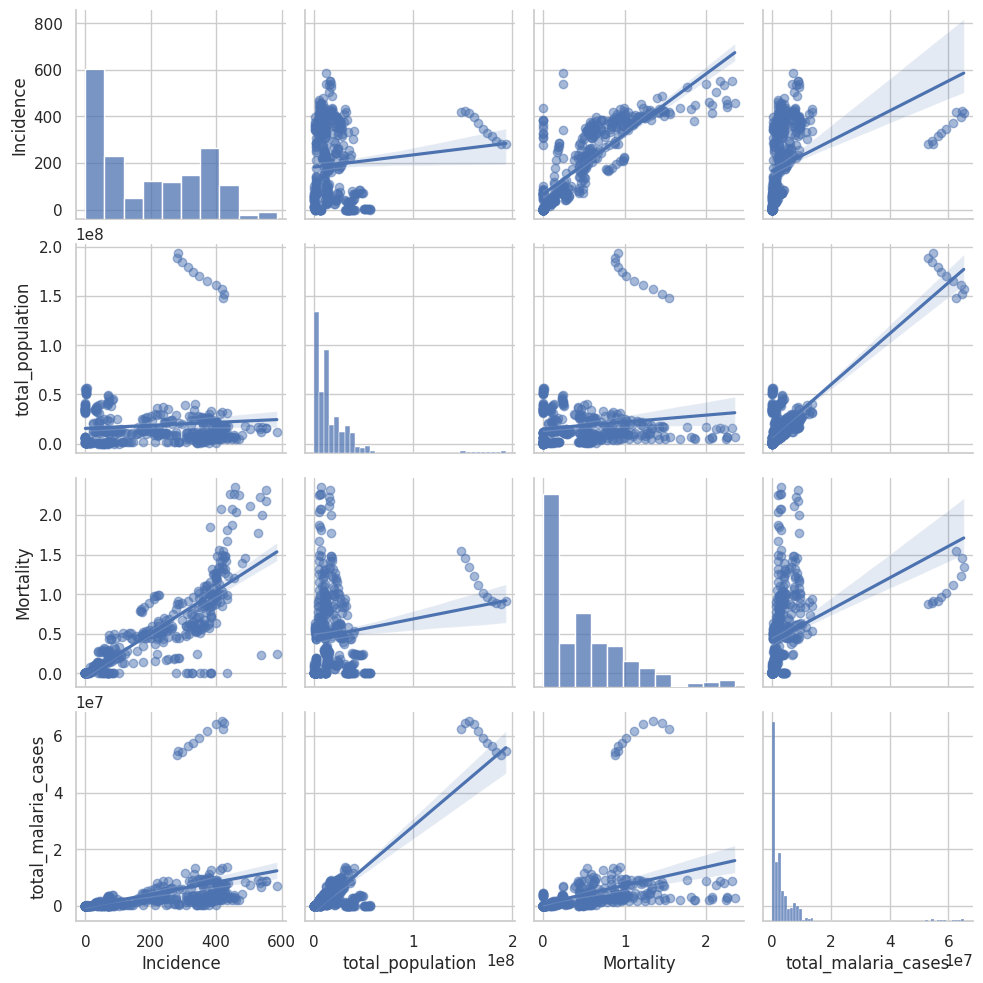

In [214]:
#Spatial regression to check for the relationship between incidence rates, mortality rate, total malaria cases populations
from pysal.model import spreg

# Create a spatial weights matrix (w) using libpysal
w = libpysal.weights.Queen.from_dataframe(sorted_merged_gdf)

# Create a pandas DataFrame for the variables
data = pd.DataFrame({
    'Incidence': sorted_merged_gdf['Incidence of malaria (per 1,000 population at risk)'],
    #'rural_population': sorted_merged_gdf['Rural Population'],
    #'urban_population': sorted_merged_gdf['Urban Population'],
    'total_population': sorted_merged_gdf['Total Population'],
    'Mortality': sorted_merged_gdf['Mortality Rate'],
    'total_malaria_cases': sorted_merged_gdf['Total Malaria Cases']
})

# Convert data to numpy arrays
y = data['Incidence'].values
X = data[['total_population', 'Mortality', 'total_malaria_cases']].values

# Perform spatial regression
model = spreg.OLS(y, X, w=w, name_y='Incidence', name_x=['total_population' 'Mortality', 'total_malaria_cases'])

# Print regression results
print(model.summary)

# Create scatter plots to visualize relationships
sns.pairplot(data, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

From the spatial regression above, we can conclude that there is a strong positive relationship between the incidence rates, mortality rates, total malaria diseases and population with an R2 of 0.7359. Now we can analyse the effect of preventive measures on these features

# Preventive Measures based analysis